In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlflow import MlflowClient
import seaborn
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from mlflow.models import infer_signature
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, matthews_corrcoef, ConfusionMatrixDisplay
# from utils import convert_bool_to_int
from sklearn.model_selection import train_test_split# Text pre-processing
import tensorflow as tf
from tensorflow.python.keras.callbacks import EarlyStopping# Modeling
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
from sklearn.svm import SVC
import ast
from sklearn.model_selection import train_test_split# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional, RepeatVector
import utils
import tqdm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from fast_ml.model_development import train_valid_test_split
from wordsegment import load, segment
from sklearn.model_selection import cross_val_score, cross_validate

2024-02-03 11:16:00.602220: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-03 11:16:00.641381: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-03 11:16:00.642483: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 11:16:01.248107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
run_NN = False

In [3]:

feature_names = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    # "domain_len",
    # "sus_keyword",
    # "sus_tld",
    # "shannon_entropy",
    # "num_dashes",
    # "num_tokens",
    # "num_parts",
    # "token_is_tld",
    # "frac_special_char",
    # # "is_ip",  # no domain is strictly an ip
    # "is_international", # hefur engin áhrif í rf
    # "frac_vowels",
    # "frac_digits",
    # "has_digit_only_subdomain", # hefur engin áhrif í rf
    # "mean_len_subdomains",
    # # "valid_tld_iana", # every line has valid iana tld
    # "has_single_char_subdomain",
    # "char_diversity",
    # "alphabet_size",
    # "is_wildcard_match",
    # "has_wildcard_san",
    # "domain_pred",
    "phish"
]



feature_names_domain = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    "domain_len",
    "new_sus_keyword",
    "sus_tld",
    "shannon_entropy",
    "num_dashes",
    "num_tokens",
    "num_parts",
    "token_is_tld_new",
    "frac_special_char",
    # "is_ip",  # no domain is strictly an ip
    "is_international", # hefur engin áhrif í rf
    "frac_vowels",
    "frac_digits",
    "has_digit_only_subdomain", # hefur engin áhrif í rf
    "mean_len_subdomains",
    # "valid_tld_iana", # every line has valid iana tld
    "has_single_char_subdomain",
    "char_diversity",
    "alphabet_size",
    "is_wildcard_match",
    "has_wildcard_san",
    # "domain_pred",
    "phish"
]


features_san_domain = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    # "domain_len",
    # "new_sus_keyword",
    # "sus_tld",
    # "shannon_entropy",
    # "num_dashes",
    # "num_tokens",
    # "num_parts",
    # "token_is_tld_new",
    # "frac_special_char",
    # "is_ip",  # no domain is strictly an ip
    # "is_international", # hefur engin áhrif í rf
    # "frac_vowels",
    # "frac_digits",
    # "has_digit_only_subdomain", # hefur engin áhrif í rf
    # "mean_len_subdomains",
    # "valid_tld_iana", # every line has valid iana tld
    # "has_single_char_subdomain",
    # "char_diversity",
    # "alphabet_size",
    # "is_wildcard_match",
    "has_wildcard_san",
    # "domain_pred",
    "phish",
    "mean_san_domain_len",
    "san_sus_keyword",
    "san_sus_tld",
    "san_shannon_entropy",
    "san_num_dashes",
    "san_num_tokens",
    "san_num_parts",
    "san_token_is_tld",
    "san_frac_special_char",
    "san_is_ip",
    "san_is_international",
    "san_frac_vowels",
    "san_frac_digits",
    "san_has_digit_only_subdomain",
    "san_mean_len_subdomains",
    "san_valid_tld_iana",
    "san_has_single_char_subdomain",
    "san_char_diversity",
    "san_alphabet_size"
]


features_all = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    "domain_len",
    "new_sus_keyword",
    "sus_tld",
    "shannon_entropy",
    "num_dashes",
    "num_tokens",
    "num_parts",
    "token_is_tld_new",
    "frac_special_char",
    # "is_ip",  # no domain is strictly an ip
    "is_international", # hefur engin áhrif í rf
    "frac_vowels",
    "frac_digits",
    "has_digit_only_subdomain", # hefur engin áhrif í rf
    "mean_len_subdomains",
    # "valid_tld_iana", # every line has valid iana tld
    "has_single_char_subdomain",
    "char_diversity",
    "alphabet_size",
    "is_wildcard_match",
    "has_wildcard_san",
    "phish",
    "mean_san_domain_len",
    "san_sus_keyword",
    "san_sus_tld",
    "san_shannon_entropy",
    "san_num_dashes",
    "san_num_tokens",
    "san_num_parts",
    "san_token_is_tld",
    "san_frac_special_char",
    "san_is_ip",
    "san_is_international",
    "san_frac_vowels",
    "san_frac_digits",
    "san_has_digit_only_subdomain",
    "san_mean_len_subdomains",
    "san_valid_tld_iana",
    "san_has_single_char_subdomain",
    "san_char_diversity",
    "san_alphabet_size"
]



In [4]:

def convert_bool_to_int(data):
    data["apple_ever_valid"] = data["apple_ever_valid"].astype(int)
    data["nss_ever_valid"] = data["nss_ever_valid"].astype(int)
    data["microsoft_ever_valid"] = data["microsoft_ever_valid"].astype(int)
    data["subject_has_country"] = data["subject_has_country"].astype(int)
    data["subject_has_province"] = data["subject_has_province"].astype(int)
    data["subject_has_locality"] = data["subject_has_locality"].astype(int)
    data["subject_has_common_name"] = data["subject_has_common_name"].astype(int)
    data["subject_only_cn"] = data["subject_only_cn"].astype(int)
    data["crl_dist_point_present"] = data["crl_dist_point_present"].astype(int)
    data["issuer_has_common_name"] = data["issuer_has_common_name"].astype(int)
    data["subject_is_empty"] = data["subject_is_empty"].astype(int)
    # data["valid_timestamps"] = data["valid_timestamps"].astype(int)
    data["authority_info_access"] = data["authority_info_access"].astype(int)
    data["certificate_policies"] = data["certificate_policies"].astype(int)
    data["basic_constraints"] = data["basic_constraints"].astype(int)
    # data["key_usage_present"] = data["key_usage_present"].astype(int)
    # data["extended_key_usage_present"] = data["extended_key_usage_present"].astype(int)
    # data["signed_certificate_timestamp"] = data["signed_certificate_timestamp"].astype(int)
    data["authority_key_id"] = data["authority_key_id"].astype(int)
    # data["in_phish"] = data["in_phish"].astype(int)
    return data


In [5]:
df = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")
df.drop_duplicates(subset=["serial_number"], inplace=True)
df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
indices = df[df.not_before_date < "2021-12-1"].index
df = df.drop(indices)

In [6]:
df["dns_names"] = df["dns_names"].apply(tuple)
df_class = df.drop_duplicates(subset=["domain","dns_names", "issuer_dn"])

In [7]:
df_class

,names,serial_number,subject_common_name,subject_country,subject_locality,subject_province,subject_organization,subject_num_fields,apple_ever_valid,microsoft_ever_valid,...,san_is_ip,san_is_international,san_frac_vowels,san_frac_digits,san_has_digit_only_subdomain,san_mean_len_subdomains,san_valid_tld_iana,san_has_single_char_subdomain,san_char_diversity,san_alphabet_size
0,[denkc.shop],366504857763249856277849125738975780317575,denkc.shop,,,,,1,True,True,...,0.0,0.0,0.222222,0.000000,0.0,0.000000,1.0,0.00,1.000000,9
1,"[b247.com.vn, mail.b247.com.vn, www.b247.com.vn]",284738735543501994713565001286746028311459,b247.com.vn,,,,,1,True,True,...,0.0,0.0,0.147059,0.264706,0.0,3.833333,1.0,0.00,0.382353,13
2,"[*.apprealizecards.com, apprealizecards.com]",359134860649975121230515155066068736172311,apprealizecards.com,,,,,1,True,True,...,0.0,0.0,0.378378,0.000000,0.0,0.500000,1.0,0.50,0.351351,13
3,"[acopgdywzr.duckdns.org, akkqpvukcp.duckdns.or...",341994358809335598613652640413025433400605,ikcwnlnyba.duckdns.org,,,,,1,True,True,...,0.0,0.0,0.226000,0.000000,0.0,10.000000,1.0,0.00,0.013000,26
4,"[*.24904122.workers.dev, 24904122.workers.dev]",275079334922121573454224969746097883665061,*.24904122.workers.dev,,,,,1,True,True,...,0.0,0.0,0.162162,0.432432,1.0,6.250000,1.0,0.50,0.378378,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18579,"[ak-staging-www.telcel.com, m.telcel.com, telc...",15483236415332984309485514108940842107,www.telcel.com,MX,Ciudad de Mexico,,Radiomovil DIPSA S.A. de C.V,6,True,True,...,0.0,0.0,0.277778,0.000000,0.0,4.500000,1.0,0.25,0.259259,14
18580,"[*.heytapimg.com, heytapimg.com]",3680867031758445497046748679738962940,*.heytapimg.com,,,,,1,True,True,...,0.0,0.0,0.400000,0.000000,0.0,0.500000,1.0,0.50,0.480000,12
18581,"[lottopcso.com, www.lottopcso.com]",315324778201205046174724217765522769406734,lottopcso.com,,,,,1,True,True,...,0.0,0.0,0.296296,0.000000,0.0,1.500000,1.0,0.00,0.296296,8
18582,"[*.webpt.com, webpt.com]",20532029326546912511627017946765057203,*.webpt.com,,,,,1,True,True,...,0.0,0.0,0.235294,0.000000,0.0,0.500000,1.0,0.50,0.529412,9


In [19]:
def balance_phish_tranco(df):
    phish = df[df.phish == 1]
    tranco = df[df.phish == 0]
    len_phish = len(phish)    
    len_tranco = len(tranco)
    if len_phish > len_tranco:
        phish = phish.sample(n=len_tranco)
    else:
        tranco = tranco.sample(n=len_phish)
    return phish.append(tranco)

df_class = balance_phish_tranco(df_class)

In [20]:
# df_class.to_pickle("balanced_final.pkl")
df_class

,names,serial_number,subject_common_name,subject_country,subject_locality,subject_province,subject_organization,subject_num_fields,apple_ever_valid,microsoft_ever_valid,...,san_is_ip,san_is_international,san_frac_vowels,san_frac_digits,san_has_digit_only_subdomain,san_mean_len_subdomains,san_valid_tld_iana,san_has_single_char_subdomain,san_char_diversity,san_alphabet_size
0,[denkc.shop],366504857763249856277849125738975780317575,denkc.shop,,,,,1,True,True,...,0.0,0.0,0.222222,0.000000,0.0,0.000000,1.0,0.0,1.000000,9
1,"[b247.com.vn, mail.b247.com.vn, www.b247.com.vn]",284738735543501994713565001286746028311459,b247.com.vn,,,,,1,True,True,...,0.0,0.0,0.147059,0.264706,0.0,3.833333,1.0,0.0,0.382353,13
2,"[*.apprealizecards.com, apprealizecards.com]",359134860649975121230515155066068736172311,apprealizecards.com,,,,,1,True,True,...,0.0,0.0,0.378378,0.000000,0.0,0.500000,1.0,0.5,0.351351,13
3,"[acopgdywzr.duckdns.org, akkqpvukcp.duckdns.or...",341994358809335598613652640413025433400605,ikcwnlnyba.duckdns.org,,,,,1,True,True,...,0.0,0.0,0.226000,0.000000,0.0,10.000000,1.0,0.0,0.013000,26
4,"[*.24904122.workers.dev, 24904122.workers.dev]",275079334922121573454224969746097883665061,*.24904122.workers.dev,,,,,1,True,True,...,0.0,0.0,0.162162,0.432432,1.0,6.250000,1.0,0.5,0.378378,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460,"[*.sav.com, sav.com]",241558607575131195910106249400066959185,sav.com,,,,,1,True,True,...,0.0,0.0,0.307692,0.000000,0.0,0.500000,1.0,0.5,0.538462,7
11886,"[*.evvelcevap.com, evvelcevap.com]",61916331574761169085846349236067871734,*.evvelcevap.com,,,,,1,True,True,...,0.0,0.0,0.370370,0.000000,0.0,0.500000,1.0,0.5,0.333333,9
17689,"[live.api.moneysupermarket.com, moneysupermark...",11713433543690034315606654315905409217,moneysupermarket.com,US,San Francisco,California,"Cloudflare, Inc.",5,True,True,...,0.0,0.0,0.452632,0.000000,0.0,2.375000,1.0,0.0,0.168421,16
14080,"[*.astivysauran.com, astivysauran.com]",383859402849360592789546730580291987457337,astivysauran.com,,,,,1,True,True,...,0.0,0.0,0.451613,0.000000,0.0,0.500000,1.0,0.5,0.419355,13


In [21]:
df_class.phish.value_counts()

1    6008
0    6008
Name: phish, dtype: int64

## Only certificate features

In [24]:
# df = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")
df = df_class
# df.drop_duplicates(subset=["serial_number"], inplace=True)
# df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
df.reset_index(drop=True, inplace=True)
df_features = df[feature_names]

# df_features = df_features.drop(columns=["issuer_org"], axis=1)
df_features = pd.get_dummies(df_features,
                             prefix=["validation_level", "pub_key_algorithm", "signature_algorithm_name"],
                             columns=["validation_level", "pub_key_algorithm", "signature_algorithm_name"])
df_features.reset_index(drop=True, inplace=True)
# print(df_features.signed_certificate_timestamp)

df_features = convert_bool_to_int(df_features)
df_features.dropna(axis=0, inplace=True)
features = df_features.drop(columns=["phish"], axis=1)
labels = df_features["phish"]



train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25,
                                                                            random_state=42)
scaler = preprocessing.StandardScaler().fit(train_features)

train_5_fold = scaler.transform(features)

train_scaled = scaler.transform(train_features)
test_scaled = scaler.transform(test_features)

In [25]:
results_df = pd.DataFrame()



print("-------- Random Forrest ----------")
rf = RandomForestClassifier(n_estimators=50, random_state=42)
cv_results = cross_validate(rf, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
MyColumns = pd.MultiIndex.from_tuples([("Fold" , ""),
                                       ("Random forest" , "F1-score"),
                                      ("Random forest", "accuracy")])

model_results_df = pd.DataFrame(columns = MyColumns)

model_results_df["Fold"] = [1, 2, 3, 4, 5] + ['Average']
model_results_df[("Random forest" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
model_results_df[("Random forest" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
results_df = pd.concat([results_df, model_results_df], ignore_index=True)
print(f"5-fold cross validation {cv_results}")
rf.fit(train_scaled, train_labels)
pred = rf.predict(test_scaled)
print(rf.score(train_scaled, train_labels))
print(f"Test score: {rf.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
conf_cert = confusion_matrix(test_labels, pred)
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ---- 10 ------")
knn = KNeighborsClassifier(n_neighbors=10)
print(f"5-fold cross validation {cross_validate(knn, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ----- 3 -----")
knn = KNeighborsClassifier(n_neighbors=3)
cv_results = cross_validate(knn, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("KNN" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("KNN" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---sigmoid --- 0.03 ----")
svm = SVC(kernel="sigmoid", C=0.03)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---linear --- 0.03 ----")
svm = SVC(kernel="linear", C=0.03)
cv_results = cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("SVM" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("SVM" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="sigmoid", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---sigmoid --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="linear", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---linear --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")



-------- Random Forrest ----------
5-fold cross validation {'fit_time': array([0.28655434, 0.28503013, 0.28746009, 0.298069  , 0.29841137]), 'score_time': array([0.01905155, 0.01810455, 0.0187149 , 0.02327323, 0.02261233]), 'test_accuracy': array([0.74758505, 0.77194456, 0.76774465, 0.76690466, 0.76680672]), 'test_f1': array([0.75257308, 0.77515528, 0.77565923, 0.77337689, 0.77701888])}
0.8626792114695341
Test score: 0.7738575268817204
Accuracy: 0.7738575268817204
Confusion matrix
[[1083  374]
 [ 299 1220]]
F1 score: 0.7838098297462256
MCC: 0.5477411012229232
-------- KNN ---- 10 ------
5-fold cross validation {'fit_time': array([0.00208259, 0.00309443, 0.00204301, 0.00208688, 0.00214028]), 'score_time': array([0.28697348, 0.04202962, 0.0386889 , 0.03863931, 0.03997183]), 'test_accuracy': array([0.75094498, 0.75136497, 0.73750525, 0.74758505, 0.73823529]), 'test_f1': array([0.77864875, 0.77660377, 0.76530229, 0.77104762, 0.76762402])}
0.7833781362007168
Test score: 0.7594086021505376
A

In [26]:
print(results_df.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
   Fold & \multicolumn{2}{l}{Random forest} & \multicolumn{2}{l}{KNN} & \multicolumn{2}{l}{SVM} \\
        &      F1-score & accuracy & F1-score & accuracy & F1-score & accuracy \\
\midrule
      1 &          0.75 &     0.75 &     0.77 &     0.73 &     0.74 &     0.72 \\
      2 &          0.78 &     0.77 &     0.78 &     0.74 &     0.75 &     0.73 \\
      3 &          0.78 &     0.77 &     0.77 &     0.73 &     0.74 &     0.71 \\
      4 &          0.77 &     0.77 &     0.77 &     0.74 &     0.73 &     0.70 \\
      5 &          0.78 &     0.77 &     0.77 &     0.73 &     0.72 &     0.69 \\
Average &          0.77 &     0.76 &     0.77 &     0.74 &     0.74 &     0.71 \\
\bottomrule
\end{tabular}



<BarContainer object of 37 artists>

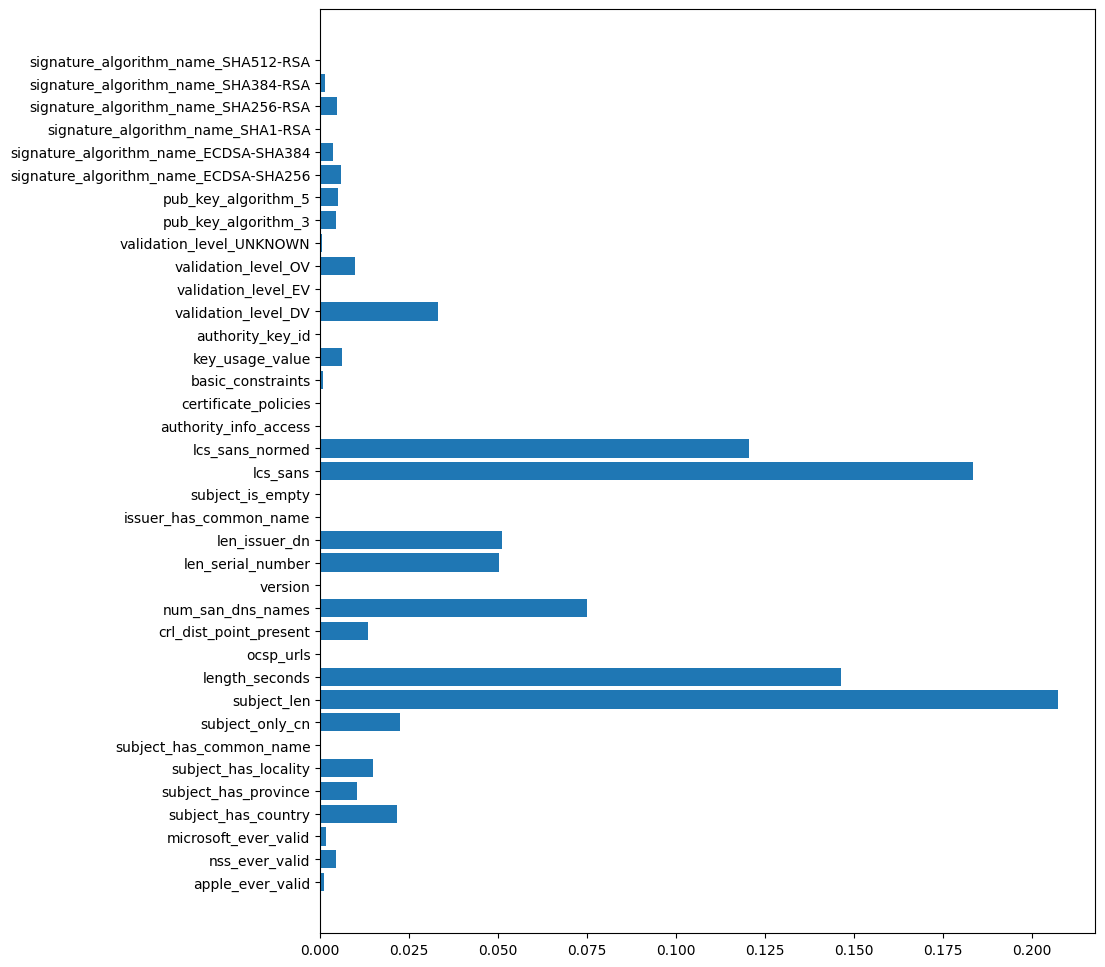

In [29]:
plt.figure(figsize=(10,12))
plt.barh(features.columns, rf.feature_importances_)

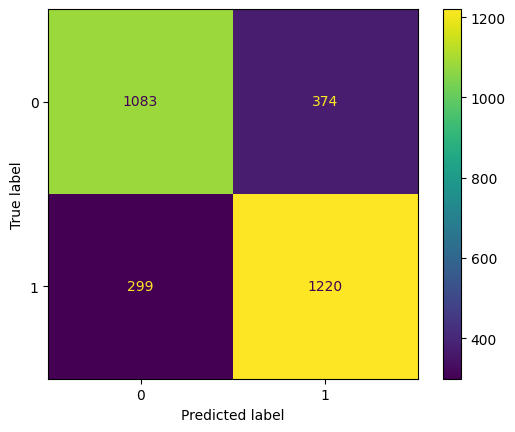

In [30]:
plotConf = ConfusionMatrixDisplay(conf_cert)
plotConf.plot()
plt.savefig("conf_cert.png")
plt.show()

In [31]:
features

,apple_ever_valid,nss_ever_valid,microsoft_ever_valid,subject_has_country,subject_has_province,subject_has_locality,subject_has_common_name,subject_only_cn,subject_len,length_seconds,...,validation_level_OV,validation_level_UNKNOWN,pub_key_algorithm_3,pub_key_algorithm_5,signature_algorithm_name_ECDSA-SHA256,signature_algorithm_name_ECDSA-SHA384,signature_algorithm_name_SHA1-RSA,signature_algorithm_name_SHA256-RSA,signature_algorithm_name_SHA384-RSA,signature_algorithm_name_SHA512-RSA
0,1,1,1,0,0,0,1,1,10,7775999,...,0,0,1,0,0,0,0,1,0,0
1,1,1,1,0,0,0,1,1,11,7775999,...,0,0,1,0,0,0,0,1,0,0
2,1,1,1,0,0,0,1,1,19,7775999,...,0,0,0,1,0,1,0,0,0,0
3,1,1,1,0,0,0,1,1,22,7775999,...,0,0,1,0,0,0,0,1,0,0
4,1,1,1,0,0,0,1,1,22,7775999,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,1,1,1,0,0,0,1,1,10,7775999,...,0,0,1,0,0,0,0,1,0,0
12011,1,1,1,0,0,0,1,1,7,3887999,...,0,0,0,1,1,0,0,0,0,0
12012,1,1,1,0,0,0,1,1,16,7775999,...,0,0,1,0,0,0,0,1,0,0
12013,1,1,1,1,1,1,1,0,51,31535999,...,1,0,0,1,1,0,0,0,0,0


In [32]:
indices[-10:]

Int64Index([16650, 17011, 17200, 17480, 17495, 17551, 17585, 17615, 18106,
            18272],
           dtype='int64')

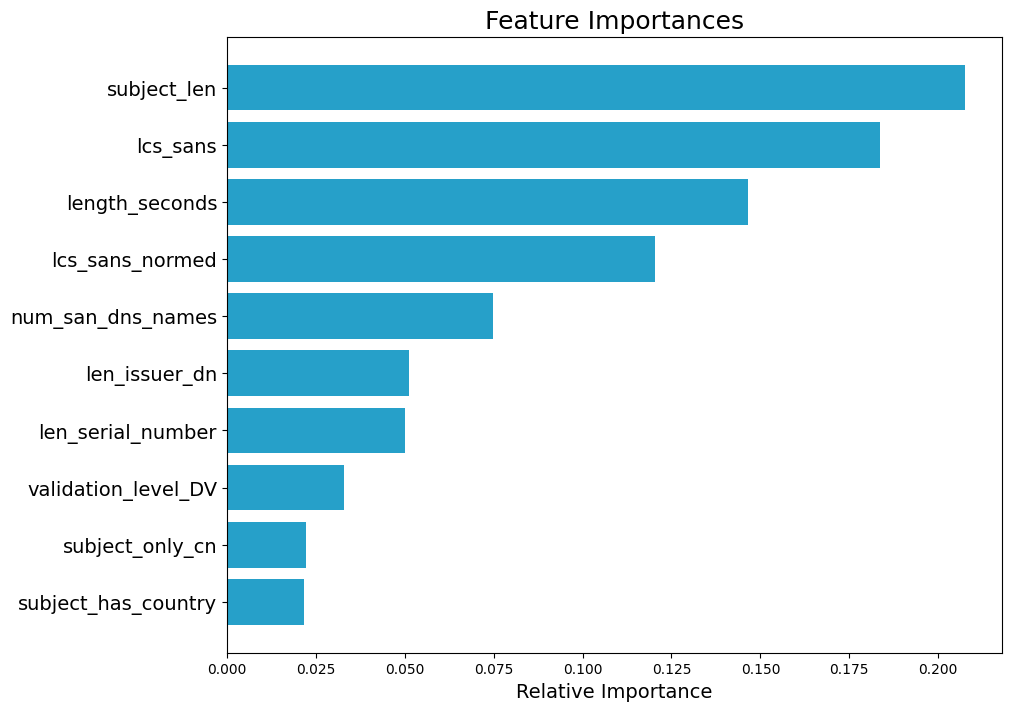

In [33]:
features_cols = features.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))

plt.title('Feature Importances', fontsize=18)
plt.barh(range(0,10), importances[indices[-10:]], color='#26A0C9', align='center')
plt.yticks(range(0,10), [features_cols[i] for i in indices[-10:]], fontsize=14)
plt.xlabel('Relative Importance', fontsize=14)
plt.savefig("featureImportanceCertOnly.pdf", bbox_inches="tight")
plt.show()

In [34]:
if run_NN:
    X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_features, target = 'phish', 
                                                                                train_size=0.7, valid_size=0.15, test_size=0.15)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_valid)
    model = tf.keras.Sequential([    
        tf.keras.layers.Dense(128, activation='relu', input_shape=(train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # prófa líka .005
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
    
    X = np.asarray(train_scaled).astype(np.float32)
    y = np.asarray(y_train).astype(np.float32)
    X_valid_trans = np.asarray(test_scaled).astype(np.float32)
    y_valid_trans = np.asarray(y_valid).astype(np.float32)
    history = model.fit(X, y, 
              epochs = 50,
             validation_data=(X_valid_trans, y_valid_trans),
             )

In [35]:
if run_NN:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## With simple domain related features

In [36]:
# df = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")
df = df_class
df.drop_duplicates(subset=["serial_number"], inplace=True)
df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
df.reset_index(drop=True, inplace=True)
df_features = df[feature_names_domain]

# df_features = df_features.drop(columns=["issuer_org"], axis=1)
df_features = pd.get_dummies(df_features,
                             prefix=["validation_level", "pub_key_algorithm", "signature_algorithm_name"],
                             columns=["validation_level", "pub_key_algorithm", "signature_algorithm_name"])
df_features.reset_index(drop=True, inplace=True)
# print(df_features.signed_certificate_timestamp)

df_features = convert_bool_to_int(df_features)
df_features.dropna(axis=0, inplace=True)
features = df_features.drop(columns=["phish"], axis=1)
labels = df_features["phish"]



train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25,
                                                                            random_state=42)
scaler = preprocessing.StandardScaler().fit(train_features)

train_5_fold = scaler.transform(features)

train_scaled = scaler.transform(train_features)
test_scaled = scaler.transform(test_features)

In [37]:
df_features.columns

Index(['apple_ever_valid', 'nss_ever_valid', 'microsoft_ever_valid',
       'subject_has_country', 'subject_has_province', 'subject_has_locality',
       'subject_has_common_name', 'subject_only_cn', 'subject_len',
       'length_seconds', 'ocsp_urls', 'crl_dist_point_present',
       'num_san_dns_names', 'version', 'len_serial_number', 'len_issuer_dn',
       'issuer_has_common_name', 'subject_is_empty', 'lcs_sans',
       'lcs_sans_normed', 'authority_info_access', 'certificate_policies',
       'basic_constraints', 'key_usage_value', 'authority_key_id',
       'domain_len', 'new_sus_keyword', 'sus_tld', 'shannon_entropy',
       'num_dashes', 'num_tokens', 'num_parts', 'token_is_tld_new',
       'frac_special_char', 'is_international', 'frac_vowels', 'frac_digits',
       'has_digit_only_subdomain', 'mean_len_subdomains',
       'has_single_char_subdomain', 'char_diversity', 'alphabet_size',
       'is_wildcard_match', 'has_wildcard_san', 'phish', 'validation_level_DV',
       'vali

In [38]:
results_df = pd.DataFrame()



print("-------- Random Forrest ----------")
rf = RandomForestClassifier(n_estimators=50, random_state=42)
cv_results = cross_validate(rf, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
MyColumns = pd.MultiIndex.from_tuples([("Fold" , ""),
                                       ("Random forest" , "F1-score"),
                                      ("Random forest", "accuracy")])

model_results_df = pd.DataFrame(columns = MyColumns)

model_results_df["Fold"] = [1, 2, 3, 4, 5] + ['Average']
model_results_df[("Random forest" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
model_results_df[("Random forest" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
results_df = pd.concat([results_df, model_results_df], ignore_index=True)
print(f"5-fold cross validation {cv_results}")
rf.fit(train_scaled, train_labels)
pred = rf.predict(test_scaled)
print(rf.score(train_scaled, train_labels))
print(f"Test score: {rf.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
conf_certdomain = confusion_matrix(test_labels, pred)
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ---- 10 ------")
knn = KNeighborsClassifier(n_neighbors=10)
print(f"5-fold cross validation {cross_validate(knn, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ----- 3 -----")
knn = KNeighborsClassifier(n_neighbors=3)
cv_results = cross_validate(knn, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("KNN" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("KNN" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---sigmoid --- 0.03 ----")
svm = SVC(kernel="sigmoid", C=0.03)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---linear --- 0.03 ----")
svm = SVC(kernel="linear", C=0.03)
cv_results = cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("SVM" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("SVM" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="sigmoid", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---sigmoid --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="linear", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---linear --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")



-------- Random Forrest ----------
5-fold cross validation {'fit_time': array([0.39160585, 0.38823295, 0.38416624, 0.38990974, 0.38634396]), 'score_time': array([0.0181036 , 0.01810932, 0.0181365 , 0.01781106, 0.01785636]), 'test_accuracy': array([0.8147837 , 0.81898362, 0.82612348, 0.81646367, 0.82226891]), 'test_f1': array([0.81064835, 0.81636131, 0.82663317, 0.81553398, 0.82484472])}
0.9838709677419355
Test score: 0.8256048387096774
Accuracy: 0.8256048387096774
Confusion matrix
[[1217  240]
 [ 279 1240]]
F1 score: 0.8269423141047016
MCC: 0.6514724919660692
-------- KNN ---- 10 ------
5-fold cross validation {'fit_time': array([0.0028677 , 0.00346899, 0.00383496, 0.00311232, 0.00296712]), 'score_time': array([0.0520432 , 0.0523591 , 0.04956341, 0.04850531, 0.05436659]), 'test_accuracy': array([0.79798404, 0.78874423, 0.80638387, 0.80386392, 0.80798319]), 'test_f1': array([0.78763797, 0.77594655, 0.79930344, 0.79345422, 0.80121792])}
0.8337813620071685
Test score: 0.8030913978494624
A

In [39]:
print(results_df.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
   Fold & \multicolumn{2}{l}{Random forest} & \multicolumn{2}{l}{KNN} & \multicolumn{2}{l}{SVM} \\
        &      F1-score & accuracy & F1-score & accuracy & F1-score & accuracy \\
\midrule
      1 &          0.81 &     0.81 &     0.79 &     0.79 &     0.79 &     0.80 \\
      2 &          0.82 &     0.82 &     0.79 &     0.79 &     0.78 &     0.80 \\
      3 &          0.83 &     0.83 &     0.81 &     0.81 &     0.80 &     0.81 \\
      4 &          0.82 &     0.82 &     0.80 &     0.80 &     0.79 &     0.80 \\
      5 &          0.82 &     0.82 &     0.81 &     0.80 &     0.79 &     0.79 \\
Average &          0.82 &     0.82 &     0.80 &     0.80 &     0.79 &     0.80 \\
\bottomrule
\end{tabular}



In [40]:
print("RF")
print(np.mean([0.81523593, 0.82913165, 0.82108805, 0.8166287 , 0.80529954]))

print("KNN")
print(np.mean([0.77602906, 0.78478002, 0.79479598, 0.7917924 , 0.77135981]))
print(np.mean([0.79159568, 0.79864253, 0.79821628, 0.80528432, 0.77382319]))

print("SVM")
print(np.mean([0.72345133, 0.73458445, 0.73813333, 0.73017621, 0.73480663]))
print(np.mean([0.74585951, 0.74862788, 0.75899673, 0.73905628, 0.74576271]))
print(np.mean([0.66864961, 0.69506726, 0.68522727, 0.6704481 , 0.6886193 ]))
print(np.mean([0.75428571, 0.74206128, 0.75846995, 0.73858447, 0.74730267]))

RF
0.817476774
KNN
0.783751454
0.7935124
SVM
0.73223039
0.747660622
0.6816023080000001
0.748140816


<BarContainer object of 56 artists>

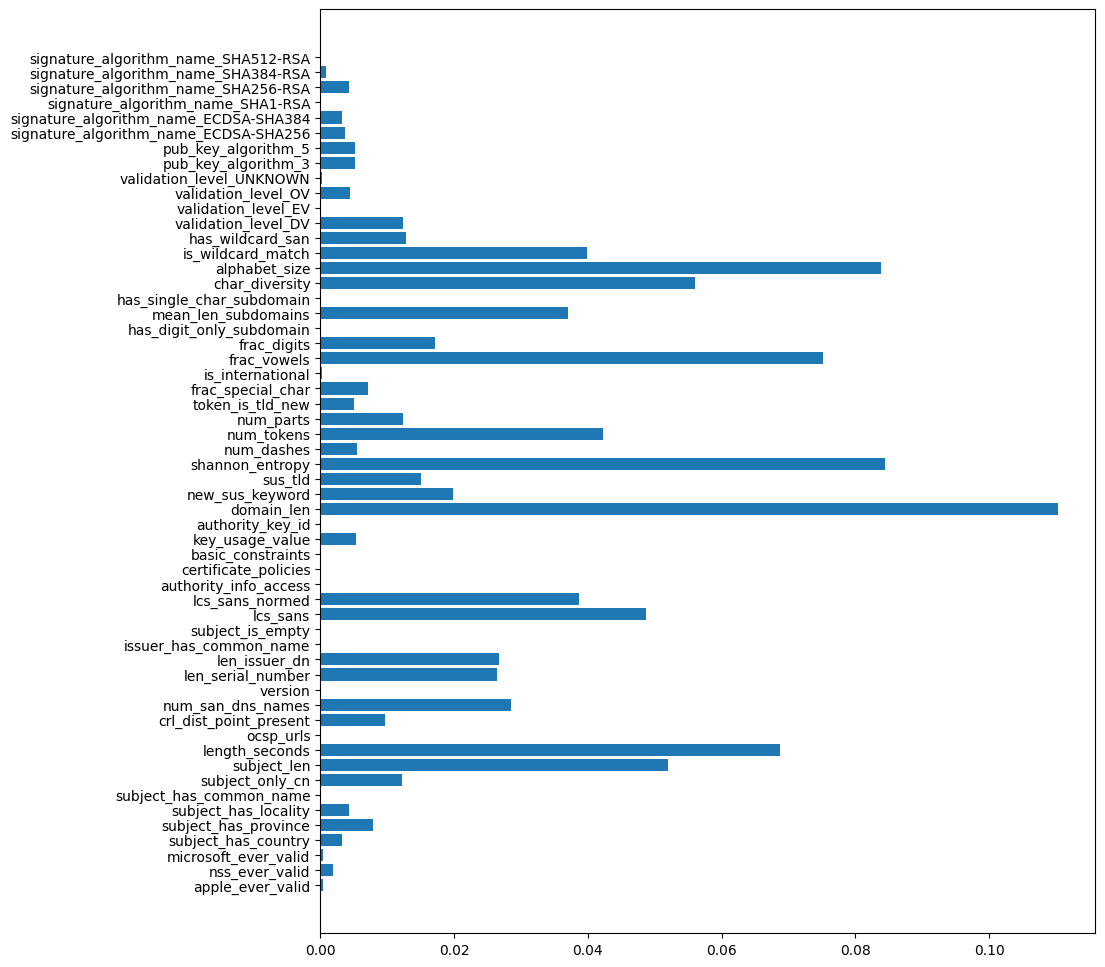

In [41]:
plt.figure(figsize=(10,12))
plt.barh(features.columns, rf.feature_importances_)

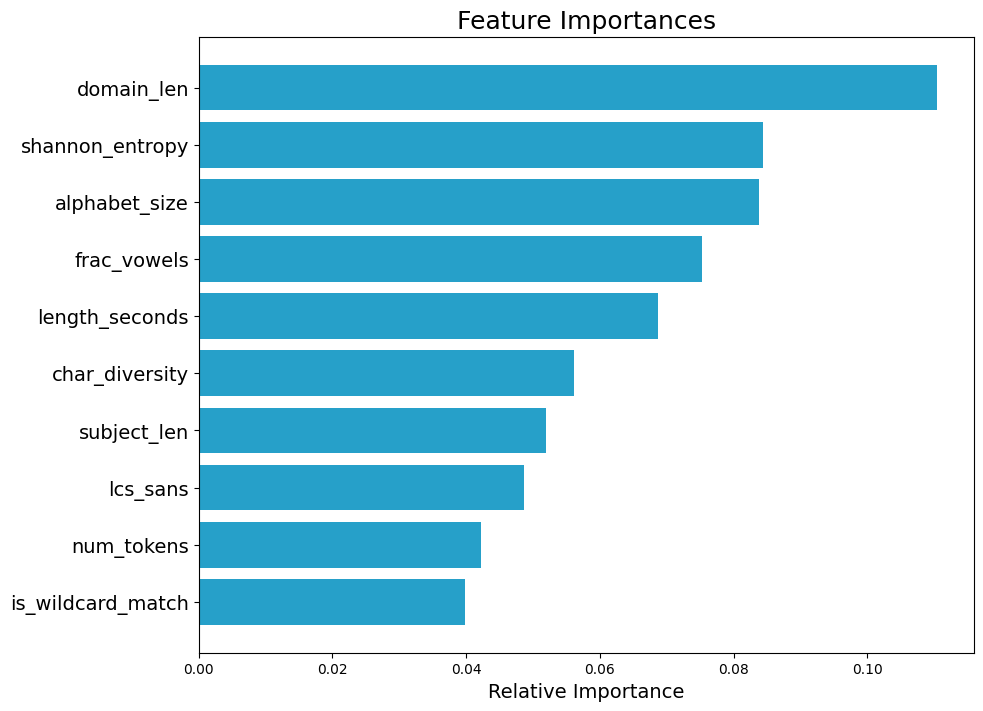

In [42]:
features_cols = features.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))

plt.title('Feature Importances', fontsize=18)
plt.barh(range(0,10), importances[indices[-10:]], color='#26A0C9', align='center')
plt.yticks(range(0,10), [features_cols[i] for i in indices[-10:]], fontsize=14)
plt.xlabel('Relative Importance', fontsize=14)
plt.savefig("featureImportanceDomain.pdf", bbox_inches="tight")
plt.show()

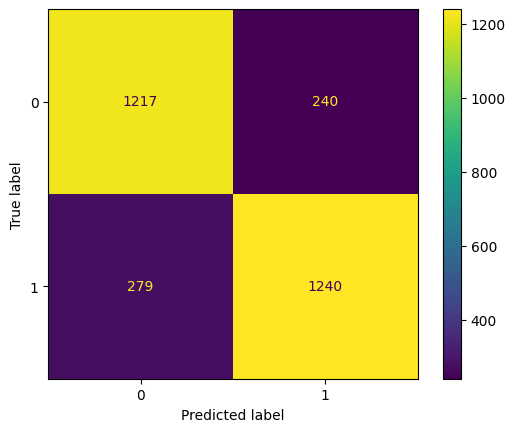

In [43]:
plotConf = ConfusionMatrixDisplay(conf_certdomain)
plotConf.plot()
plt.savefig("conf_certdomain.png")
plt.show()

In [44]:
if run_NN:
    X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_features, target = 'phish', 
                                                                                train_size=0.7, valid_size=0.15, test_size=0.15)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_valid)
    model = tf.keras.Sequential([    
        tf.keras.layers.Dense(128, activation='relu', input_shape=(train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # prófa líka .005
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
    
    X = np.asarray(train_scaled).astype(np.float32)
    y = np.asarray(y_train).astype(np.float32)
    X_valid_trans = np.asarray(test_scaled).astype(np.float32)
    y_valid_trans = np.asarray(y_valid).astype(np.float32)
    history = model.fit(X, y, 
              epochs = 50,
             validation_data=(X_valid_trans, y_valid_trans),
             )

In [45]:
if run_NN:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## With SAN based domain features

In [46]:
# df = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")
df = df_class
df.drop_duplicates(subset=["serial_number"], inplace=True)
df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
df.reset_index(drop=True, inplace=True)
df_features = df[features_san_domain]

# df_features = df_features.drop(columns=["issuer_org"], axis=1)
df_features = pd.get_dummies(df_features,
                             prefix=["validation_level", "pub_key_algorithm", "signature_algorithm_name"],
                             columns=["validation_level", "pub_key_algorithm", "signature_algorithm_name"])
df_features.reset_index(drop=True, inplace=True)
# print(df_features.signed_certificate_timestamp)

df_features = convert_bool_to_int(df_features)
df_features.dropna(axis=0, inplace=True)
features = df_features.drop(columns=["phish"], axis=1)
labels = df_features["phish"]



train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25,
                                                                            random_state=42)
scaler = preprocessing.StandardScaler().fit(train_features)

train_5_fold = scaler.transform(features)

train_scaled = scaler.transform(train_features)
test_scaled = scaler.transform(test_features)

In [47]:
results_df = pd.DataFrame()



print("-------- Random Forrest ----------")
rf = RandomForestClassifier(n_estimators=50, random_state=42)
cv_results = cross_validate(rf, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
MyColumns = pd.MultiIndex.from_tuples([("Fold" , ""),
                                       ("Random forest" , "F1-score"),
                                      ("Random forest", "accuracy")])

model_results_df = pd.DataFrame(columns = MyColumns)

model_results_df["Fold"] = [1, 2, 3, 4, 5] + ['Average']
model_results_df[("Random forest" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
model_results_df[("Random forest" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
results_df = pd.concat([results_df, model_results_df], ignore_index=True)
print(f"5-fold cross validation {cv_results}")
rf.fit(train_scaled, train_labels)
pred = rf.predict(test_scaled)
print(rf.score(train_scaled, train_labels))
print(f"Test score: {rf.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
conf_certsan = confusion_matrix(test_labels, pred)
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ---- 10 ------")
knn = KNeighborsClassifier(n_neighbors=10)
print(f"5-fold cross validation {cross_validate(knn, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ----- 3 -----")
knn = KNeighborsClassifier(n_neighbors=3)
cv_results = cross_validate(knn, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("KNN" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("KNN" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---sigmoid --- 0.03 ----")
svm = SVC(kernel="sigmoid", C=0.03)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---linear --- 0.03 ----")
svm = SVC(kernel="linear", C=0.03)
cv_results = cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("SVM" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("SVM" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="sigmoid", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---sigmoid --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="linear", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---linear --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")



-------- Random Forrest ----------
5-fold cross validation {'fit_time': array([0.56381702, 0.51546192, 0.58849382, 0.54099226, 0.51756597]), 'score_time': array([0.02236986, 0.01905942, 0.01873064, 0.01987004, 0.02315879]), 'test_accuracy': array([0.79336413, 0.79168417, 0.79294414, 0.80050399, 0.80168067]), 'test_f1': array([0.79292929, 0.79229481, 0.79636514, 0.80167015, 0.80718954])}
0.9814068100358423
Test score: 0.8024193548387096
Accuracy: 0.8024193548387096
Confusion matrix
[[1165  292]
 [ 296 1223]]
F1 score: 0.8061964403427818
MCC: 0.6046914591467961
-------- KNN ---- 10 ------
5-fold cross validation {'fit_time': array([0.00274944, 0.00313449, 0.00300074, 0.00342774, 0.00305796]), 'score_time': array([0.05199885, 0.04995465, 0.051687  , 0.04896164, 0.05384374]), 'test_accuracy': array([0.77866443, 0.76900462, 0.78832423, 0.77362453, 0.79117647]), 'test_f1': array([0.7707699 , 0.76045296, 0.7840617 , 0.7673716 , 0.78967414])}
0.8200044802867383
Test score: 0.7866263440860215
A

In [48]:
print(results_df.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
   Fold & \multicolumn{2}{l}{Random forest} & \multicolumn{2}{l}{KNN} & \multicolumn{2}{l}{SVM} \\
        &      F1-score & accuracy & F1-score & accuracy & F1-score & accuracy \\
\midrule
      1 &          0.79 &     0.79 &     0.76 &     0.76 &     0.74 &     0.74 \\
      2 &          0.79 &     0.79 &     0.77 &     0.77 &     0.75 &     0.75 \\
      3 &          0.80 &     0.79 &     0.79 &     0.78 &     0.76 &     0.75 \\
      4 &          0.80 &     0.80 &     0.77 &     0.76 &     0.74 &     0.75 \\
      5 &          0.81 &     0.80 &     0.79 &     0.78 &     0.75 &     0.74 \\
Average &          0.80 &     0.80 &     0.78 &     0.77 &     0.75 &     0.75 \\
\bottomrule
\end{tabular}



In [49]:
print("RF")
print(np.mean([0.78950371, 0.80353201, 0.79431072, 0.79681275, 0.78640227]))

print("KNN")
print(np.mean([0.76623377, 0.76388889, 0.76843911, 0.75324675, 0.76018626]))
print(np.mean([0.76147816, 0.78433536, 0.78014184, 0.78128523, 0.75908329]))

print("SVM")
print(np.mean([0.72345133, 0.73458445, 0.73813333, 0.73017621, 0.73480663]))
print(np.mean([0.74585951, 0.74862788, 0.75899673, 0.73905628, 0.74576271]))
print(np.mean([0.66864961, 0.69506726, 0.68522727, 0.6704481 , 0.6886193 ]))
print(np.mean([0.75428571, 0.74206128, 0.75846995, 0.73858447, 0.74730267]))

RF
0.794112292
KNN
0.762398956
0.773264776
SVM
0.73223039
0.747660622
0.6816023080000001
0.748140816


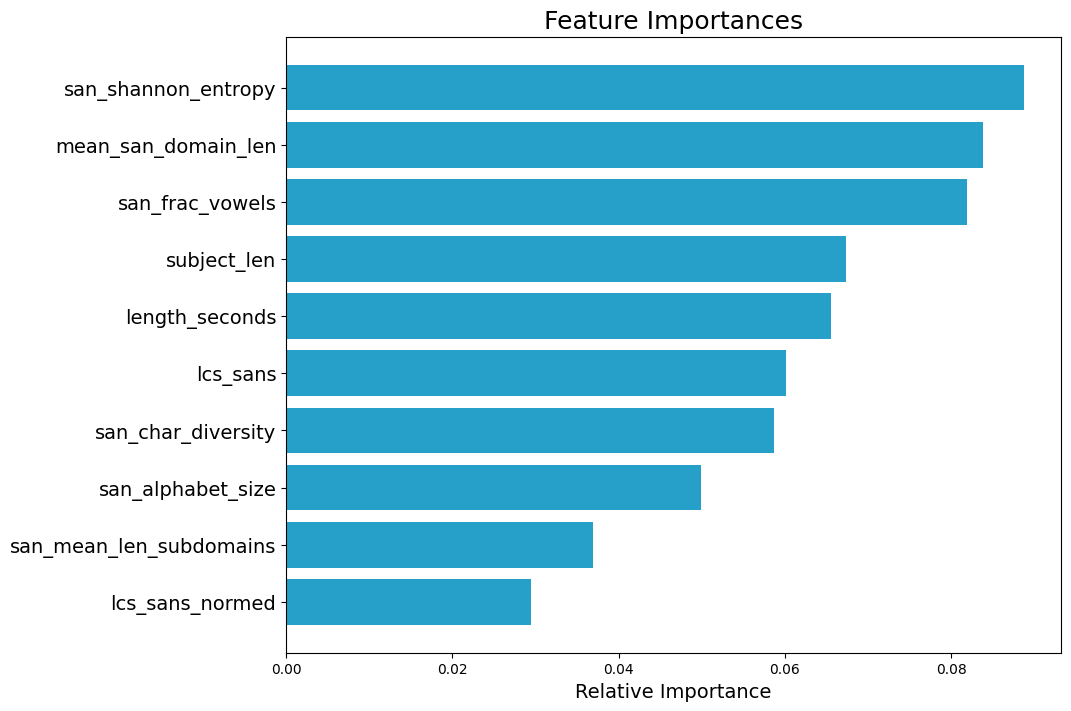

In [50]:
features_cols = features.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))

plt.title('Feature Importances', fontsize=18)
plt.barh(range(0,10), importances[indices[-10:]], color='#26A0C9', align='center')
plt.yticks(range(0,10), [features_cols[i] for i in indices[-10:]], fontsize=14)
plt.xlabel('Relative Importance', fontsize=14)
plt.savefig("featureImportanceSan.pdf", bbox_inches="tight")
plt.show()

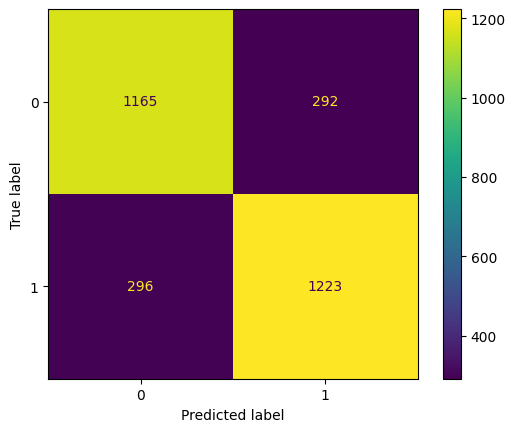

In [51]:
plotConf = ConfusionMatrixDisplay(conf_certsan)
plotConf.plot()
plt.savefig("conf_certsan.png")
plt.show()

In [52]:
if run_NN:
    X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_features, target = 'phish', 
                                                                                train_size=0.7, valid_size=0.15, test_size=0.15)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_valid)
    model = tf.keras.Sequential([    
        tf.keras.layers.Dense(128, activation='relu', input_shape=(train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # prófa líka .005
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
    
    X = np.asarray(train_scaled).astype(np.float32)
    y = np.asarray(y_train).astype(np.float32)
    X_valid_trans = np.asarray(test_scaled).astype(np.float32)
    y_valid_trans = np.asarray(y_valid).astype(np.float32)
    history = model.fit(X, y, 
              epochs = 50,
             validation_data=(X_valid_trans, y_valid_trans),
             )

In [53]:
if run_NN:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## With SAN and domain based features

In [54]:
# df = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")
df = df_class
df.drop_duplicates(subset=["serial_number"], inplace=True)
df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
df.reset_index(drop=True, inplace=True)
df_features = df[features_all]

# df_features = df_features.drop(columns=["issuer_org"], axis=1)
df_features = pd.get_dummies(df_features,
                             prefix=["validation_level", "pub_key_algorithm", "signature_algorithm_name"],
                             columns=["validation_level", "pub_key_algorithm", "signature_algorithm_name"])
df_features.reset_index(drop=True, inplace=True)
# print(df_features.signed_certificate_timestamp)

df_features = convert_bool_to_int(df_features)
df_features.dropna(axis=0, inplace=True)
features = df_features.drop(columns=["phish"], axis=1)
labels = df_features["phish"]



train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25,
                                                                            random_state=42)
scaler = preprocessing.StandardScaler().fit(train_features)

train_5_fold = scaler.transform(features)

train_scaled = scaler.transform(train_features)
test_scaled = scaler.transform(test_features)

In [55]:
results_df = pd.DataFrame()



print("-------- Random Forrest ----------")
rf = RandomForestClassifier(n_estimators=50, random_state=42)
cv_results = cross_validate(rf, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
MyColumns = pd.MultiIndex.from_tuples([("Fold" , ""),
                                       ("Random forest" , "F1-score"),
                                      ("Random forest", "accuracy")])

model_results_df = pd.DataFrame(columns = MyColumns)

model_results_df["Fold"] = [1, 2, 3, 4, 5] + ['Average']
model_results_df[("Random forest" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
model_results_df[("Random forest" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
results_df = pd.concat([results_df, model_results_df], ignore_index=True)
print(f"5-fold cross validation {cv_results}")
rf.fit(train_scaled, train_labels)
pred = rf.predict(test_scaled)
print(rf.score(train_scaled, train_labels))
print(f"Test score: {rf.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
conf_certdomainsan = confusion_matrix(test_labels, pred)
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ---- 10 ------")
knn = KNeighborsClassifier(n_neighbors=10)
print(f"5-fold cross validation {cross_validate(knn, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ----- 3 -----")
knn = KNeighborsClassifier(n_neighbors=3)
cv_results = cross_validate(knn, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("KNN" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("KNN" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---sigmoid --- 0.03 ----")
svm = SVC(kernel="sigmoid", C=0.03)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---linear --- 0.03 ----")
svm = SVC(kernel="linear", C=0.03)
cv_results = cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("SVM" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("SVM" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="sigmoid", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---sigmoid --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="linear", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---linear --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")



-------- Random Forrest ----------
5-fold cross validation {'fit_time': array([0.57174969, 0.50995064, 0.51793981, 0.51817942, 0.53812265]), 'score_time': array([0.01739168, 0.01736116, 0.01725054, 0.01764178, 0.02662992]), 'test_accuracy': array([0.82318354, 0.82108358, 0.82360353, 0.82738345, 0.82605042]), 'test_f1': array([0.81892473, 0.81856899, 0.8238255 , 0.82694737, 0.82920792])}
0.9845430107526881
Test score: 0.8282930107526881
Accuracy: 0.8282930107526881
Confusion matrix
[[1223  234]
 [ 277 1242]]
F1 score: 0.8293823038397328
MCC: 0.6569179655600312
-------- KNN ---- 10 ------
5-fold cross validation {'fit_time': array([0.00354028, 0.00351429, 0.00353503, 0.00398493, 0.0035522 ]), 'score_time': array([0.05404687, 0.05603218, 0.05354214, 0.04822135, 0.04719043]), 'test_accuracy': array([0.79756405, 0.7900042 , 0.79882402, 0.80092398, 0.81428571]), 'test_f1': array([0.78841089, 0.7785651 , 0.79146713, 0.79319372, 0.81078767])}
0.8379256272401434
Test score: 0.803763440860215
Ac

In [56]:
print(results_df.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
   Fold & \multicolumn{2}{l}{Random forest} & \multicolumn{2}{l}{KNN} & \multicolumn{2}{l}{SVM} \\
        &      F1-score & accuracy & F1-score & accuracy & F1-score & accuracy \\
\midrule
      1 &          0.82 &     0.82 &     0.79 &     0.79 &     0.80 &     0.81 \\
      2 &          0.82 &     0.82 &     0.80 &     0.80 &     0.79 &     0.80 \\
      3 &          0.82 &     0.82 &     0.80 &     0.80 &     0.81 &     0.81 \\
      4 &          0.83 &     0.83 &     0.80 &     0.80 &     0.80 &     0.81 \\
      5 &          0.83 &     0.83 &     0.81 &     0.80 &     0.80 &     0.80 \\
Average &          0.82 &     0.82 &     0.80 &     0.80 &     0.80 &     0.81 \\
\bottomrule
\end{tabular}



In [57]:
print("RF")
print(np.mean([0.8225256 , 0.83351955, 0.81939799, 0.82232346, 0.80990783]))

print("KNN")
print(np.mean([0.79044776, 0.79600235, 0.79835873, 0.78614098, 0.78193702]))
print(np.mean([0.79820124, 0.79755962, 0.80485116, 0.79977117, 0.78216704]))

print("SVM")
print(np.mean([0.7833935 , 0.79361325, 0.78629501, 0.77744807, 0.76738609]))
print(np.mean([0.80356083, 0.80332739, 0.80349854, 0.78813056, 0.78208955]))
print(np.mean([0.75131043, 0.75245239, 0.75601375, 0.73252455, 0.72856298]))
print(np.mean([0.79593058, 0.80810489, 0.7992937 , 0.77724551, 0.78890229]))

RF
0.821534886
KNN
0.7905773679999999
0.7965100460000001
SVM
0.7816271840000001
0.7961213739999999
0.74417282
0.7938953940000001


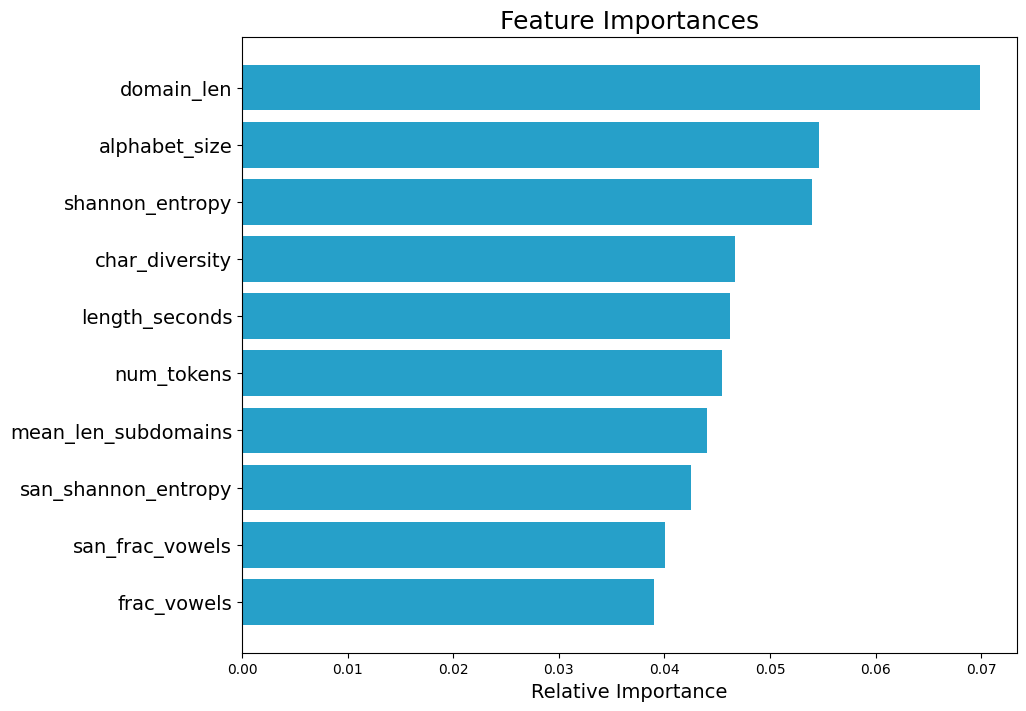

In [58]:
features_cols = features.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))

plt.title('Feature Importances', fontsize=18)
plt.barh(range(0,10), importances[indices[-10:]], color='#26A0C9', align='center')
plt.yticks(range(0,10), [features_cols[i] for i in indices[-10:]], fontsize=14)
plt.xlabel('Relative Importance', fontsize=14)
plt.savefig("featureImportanceSanDomain.pdf", bbox_inches="tight")
plt.show()

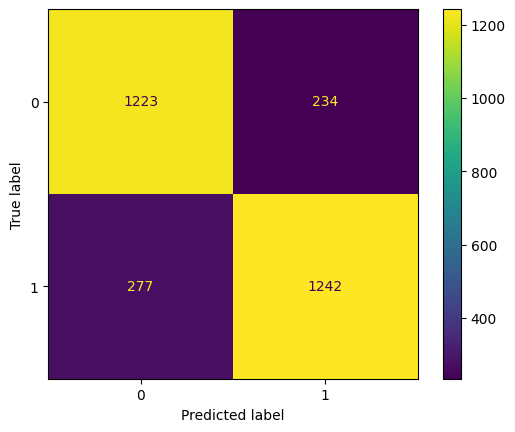

In [59]:
plotConf = ConfusionMatrixDisplay(conf_certdomainsan)
plotConf.plot()
plt.savefig("conf_certdomainsan.png")
plt.show()

In [60]:
if run_NN:
    X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_features, target = 'phish', 
                                                                                train_size=0.7, valid_size=0.15, test_size=0.15)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_valid)
    model = tf.keras.Sequential([    
        tf.keras.layers.Dense(128, activation='relu', input_shape=(train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # prófa líka .005
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
    
    X = np.asarray(train_scaled).astype(np.float32)
    y = np.asarray(y_train).astype(np.float32)
    X_valid_trans = np.asarray(test_scaled).astype(np.float32)
    y_valid_trans = np.asarray(y_valid).astype(np.float32)
    history = model.fit(X, y, 
              epochs = 50,
             validation_data=(X_valid_trans, y_valid_trans),
             )

In [61]:
if run_NN:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## With LSTM features

#### Extract the second last layer to use as features

In [62]:
# read in saved model trained in google colab with GPU
model2 = tf.keras.models.load_model('saved_model/my_model')

In [63]:
extract_layer_model = tf.keras.Model(
    inputs=model2.input,
    outputs=model2.layers[-2].output
)

In [64]:
max_len = 50
trunc_type = 'post'
padding_type = 'post'
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [65]:
# sentences = []
# load()
# for domain in ["ruv.is", "elgiganten.group"]:
#     parts = domain.split(".")
#     sentence = ""
#     for part in parts:
#         segments = segment(part)
#         bit = " ".join(segments)
#         sentence = sentence + " " + bit
#     sentences.append(sentence)

In [66]:
################################
# Create "sentences" from domain names using word segmentation on each token
################################

sentences = []
load()
for domain in df_class.domain:
    parts = domain.split(".")
    sentence = ""
    for part in parts:
        segments = segment(part)
        bit = " ".join(segments)
        sentence = sentence + " " + bit
    sentences.append(sentence)
df_class["domain_sent"] = sentences

In [67]:
new_seq = tokenizer.texts_to_sequences(df_class["domain_sent"])
padded = pad_sequences(new_seq, 
                         maxlen = max_len,
                         padding = padding_type,
                         truncating = trunc_type)
pred = extract_layer_model.predict(padded)

376/376 [==============================] - 11s 27ms/step


In [68]:
df_preds = pd.DataFrame(pred, columns=[f'lstm_feature_{i}' for i in range(len(pred[0]))])

In [69]:
df_preds

,lstm_feature_0,lstm_feature_1,lstm_feature_2,lstm_feature_3,lstm_feature_4,lstm_feature_5,lstm_feature_6,lstm_feature_7,lstm_feature_8,lstm_feature_9,...,lstm_feature_22,lstm_feature_23,lstm_feature_24,lstm_feature_25,lstm_feature_26,lstm_feature_27,lstm_feature_28,lstm_feature_29,lstm_feature_30,lstm_feature_31
0,0.380969,0.016544,0.013248,0.0,0.0,0.0,0.0,0.0,0.201300,0.0,...,0.404648,0.342507,0.009955,0.017331,0.292741,0.433795,0.068974,0.019643,0.013243,0.038540
1,0.379235,0.019008,0.014975,0.0,0.0,0.0,0.0,0.0,0.200629,0.0,...,0.402773,0.340938,0.010874,0.019592,0.291417,0.431808,0.071384,0.022224,0.015046,0.040039
2,0.272752,0.170318,0.121020,0.0,0.0,0.0,0.0,0.0,0.159439,0.0,...,0.287649,0.244596,0.067283,0.158481,0.210097,0.309758,0.219354,0.180731,0.125804,0.132051
3,0.028404,0.517542,0.364381,0.0,0.0,0.0,0.0,0.0,0.064933,0.0,...,0.023462,0.023517,0.196704,0.477219,0.023502,0.029684,0.558882,0.544480,0.379967,0.343175
4,0.026020,0.520930,0.366755,0.0,0.0,0.0,0.0,0.0,0.064011,0.0,...,0.020884,0.021360,0.197967,0.480329,0.021681,0.026951,0.562194,0.548029,0.382447,0.345235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12011,0.380598,0.017071,0.013618,0.0,0.0,0.0,0.0,0.0,0.201156,0.0,...,0.404247,0.342171,0.010152,0.017814,0.292458,0.433370,0.069490,0.020196,0.013628,0.038861
12012,0.273251,0.169608,0.120523,0.0,0.0,0.0,0.0,0.0,0.159632,0.0,...,0.288189,0.245047,0.067018,0.157829,0.210478,0.310331,0.218660,0.179988,0.125284,0.131619
12013,0.380598,0.017071,0.013618,0.0,0.0,0.0,0.0,0.0,0.201156,0.0,...,0.404247,0.342171,0.010152,0.017814,0.292458,0.433370,0.069490,0.020196,0.013628,0.038861
12014,0.271351,0.172309,0.122416,0.0,0.0,0.0,0.0,0.0,0.158897,0.0,...,0.286134,0.243328,0.068025,0.160308,0.209027,0.308152,0.221301,0.182817,0.127261,0.133261


In [70]:
# df = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")
df = df_class
df.drop_duplicates(subset=["serial_number"], inplace=True)
df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
df.reset_index(drop=True, inplace=True)
df_features = df[feature_names_domain]
df_features_merged = df_features.join(df_preds)#, left_index=True, right_index=True)
# df_features = df_features.drop(columns=["issuer_org"], axis=1)
df_features_merged = pd.get_dummies(df_features_merged,
                             prefix=["validation_level", "pub_key_algorithm", "signature_algorithm_name"],
                             columns=["validation_level", "pub_key_algorithm", "signature_algorithm_name"])
df_features_merged.reset_index(drop=True, inplace=True)
# print(df_features.signed_certificate_timestamp)

df_features_merged = convert_bool_to_int(df_features_merged)
df_features_merged.dropna(axis=0, inplace=True)
features = df_features_merged.drop(columns=["phish"], axis=1)
labels = df_features_merged["phish"]

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25,
                                                                            random_state=42)
scaler = preprocessing.StandardScaler().fit(train_features)

train_5_fold = scaler.transform(features)

train_scaled = scaler.transform(train_features)
test_scaled = scaler.transform(test_features)

In [71]:
df_class.columns

Index(['names', 'serial_number', 'subject_common_name', 'subject_country',
       'subject_locality', 'subject_province', 'subject_organization',
       'subject_num_fields', 'apple_ever_valid', 'microsoft_ever_valid',
       ...
       'san_is_international', 'san_frac_vowels', 'san_frac_digits',
       'san_has_digit_only_subdomain', 'san_mean_len_subdomains',
       'san_valid_tld_iana', 'san_has_single_char_subdomain',
       'san_char_diversity', 'san_alphabet_size', 'domain_sent'],
      dtype='object', length=107)

In [72]:
results_df = pd.DataFrame()



print("-------- Random Forrest ----------")
rf = RandomForestClassifier(n_estimators=50, random_state=42)
cv_results = cross_validate(rf, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
MyColumns = pd.MultiIndex.from_tuples([("Fold" , ""),
                                       ("Random forest" , "F1-score"),
                                      ("Random forest", "accuracy")])

model_results_df = pd.DataFrame(columns = MyColumns)

model_results_df["Fold"] = [1, 2, 3, 4, 5] + ['Average']
model_results_df[("Random forest" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
model_results_df[("Random forest" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
results_df = pd.concat([results_df, model_results_df], ignore_index=True)
print(f"5-fold cross validation {cv_results}")
rf.fit(train_scaled, train_labels)
pred = rf.predict(test_scaled)
print(rf.score(train_scaled, train_labels))
print(f"Test score: {rf.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
conf_lstm = confusion_matrix(test_labels, pred)
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ---- 10 ------")
knn = KNeighborsClassifier(n_neighbors=10)
print(f"5-fold cross validation {cross_validate(knn, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ----- 3 -----")
knn = KNeighborsClassifier(n_neighbors=3)
cv_results = cross_validate(knn, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("KNN" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("KNN" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---sigmoid --- 0.03 ----")
svm = SVC(kernel="sigmoid", C=0.03)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---linear --- 0.03 ----")
svm = SVC(kernel="linear", C=0.03)
cv_results = cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("SVM" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("SVM" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="sigmoid", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---sigmoid --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="linear", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_5_fold, labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---linear --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")



-------- Random Forrest ----------
5-fold cross validation {'fit_time': array([1.0026629 , 0.94758821, 0.94895482, 0.94155073, 0.95281935]), 'score_time': array([0.0162375 , 0.01582408, 0.01569223, 0.01562381, 0.02020049]), 'test_accuracy': array([0.88240235, 0.89122218, 0.89878202, 0.88786224, 0.88067227]), 'test_f1': array([0.88034188, 0.88869789, 0.89920535, 0.88525999, 0.88107203])}
0.9995519713261649
Test score: 0.8860887096774194
Accuracy: 0.8860887096774194
Confusion matrix
[[1298  159]
 [ 180 1339]]
F1 score: 0.8876367252237322
MCC: 0.7722224463874884
-------- KNN ---- 10 ------
5-fold cross validation {'fit_time': array([0.00442529, 0.00376654, 0.0057292 , 0.00395179, 0.00386715]), 'score_time': array([0.06453633, 0.06074166, 0.05757213, 0.05804658, 0.06077695]), 'test_accuracy': array([0.83536329, 0.84418312, 0.86182276, 0.85300294, 0.84705882]), 'test_f1': array([0.82515611, 0.8363476 , 0.85800604, 0.84416741, 0.84228769])}
0.8692876344086021
Test score: 0.8501344086021505
A

In [73]:
print(results_df.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
   Fold & \multicolumn{2}{l}{Random forest} & \multicolumn{2}{l}{KNN} & \multicolumn{2}{l}{SVM} \\
        &      F1-score & accuracy & F1-score & accuracy & F1-score & accuracy \\
\midrule
      1 &          0.88 &     0.88 &     0.83 &     0.83 &     0.85 &     0.85 \\
      2 &          0.89 &     0.89 &     0.84 &     0.84 &     0.84 &     0.84 \\
      3 &          0.90 &     0.90 &     0.85 &     0.85 &     0.86 &     0.86 \\
      4 &          0.89 &     0.89 &     0.84 &     0.84 &     0.85 &     0.86 \\
      5 &          0.88 &     0.88 &     0.85 &     0.85 &     0.85 &     0.86 \\
Average &          0.89 &     0.89 &     0.84 &     0.84 &     0.85 &     0.86 \\
\bottomrule
\end{tabular}



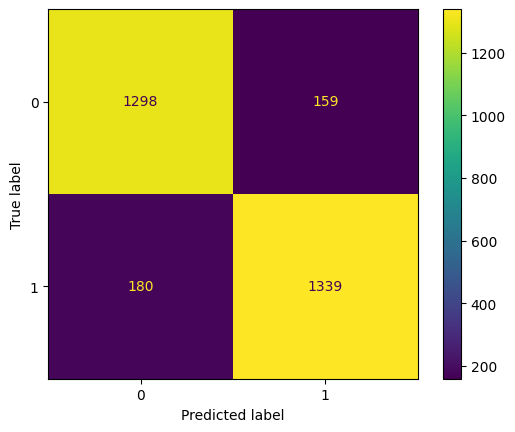

In [74]:
plotConf = ConfusionMatrixDisplay(conf_lstm)
plotConf.plot()
plt.savefig("conf_lstm.png", transparent=True)
plt.show()

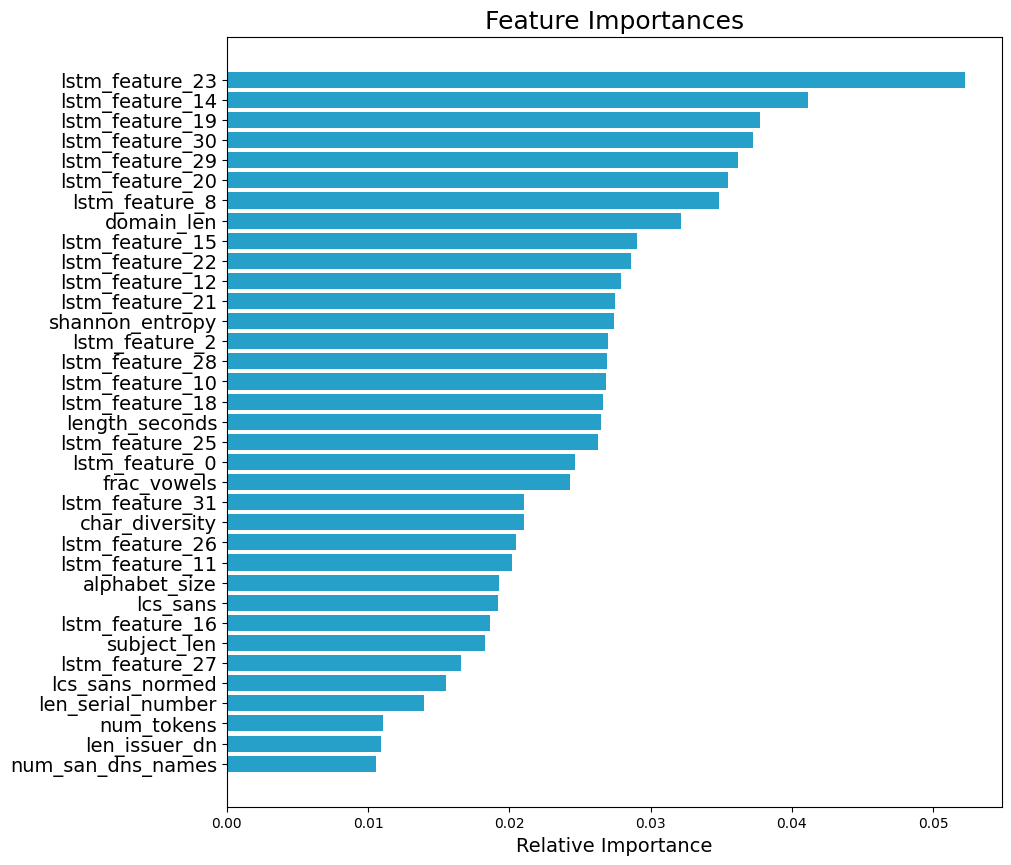

In [75]:
features_cols = features.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))

plt.title('Feature Importances', fontsize=18)
plt.barh(range(0,35), importances[indices[-35:]], color='#26A0C9', align='center')
plt.yticks(range(0,35), [features_cols[i] for i in indices[-35:]], fontsize=14)
plt.xlabel('Relative Importance', fontsize=14)
plt.savefig("featureImportanceLSTMfeatures.pdf", bbox_inches="tight")
plt.show()

In [76]:
pred_prob = rf.predict_proba(test_scaled)
pred = rf.predict(test_scaled)

In [77]:
pred_diff = pred - test_labels

In [78]:
pred_diff.reset_index(drop=True, inplace=True)

In [79]:
fn_indices = pred_diff[pred_diff == -1].index

In [80]:
fn_indices

Int64Index([   5,   54,   85,   98,  112,  118,  181,  182,  187,  191,
            ...
            2900, 2906, 2916, 2929, 2946, 2948, 2955, 2962, 2966, 2974],
           dtype='int64', length=180)

In [81]:
new_pred = []
thresholds = [x for x in np.arange(0.30, 1.0, 0.05)]
fn = []
fp = []

for thresh in thresholds:
    new_pred = []
    for value in pred_prob[:,0]:
        if value > thresh:
            new_pred.append(0)
        else:
            new_pred.append(1)
    fn.append(confusion_matrix(test_labels, new_pred)[1,0])
    fp.append(confusion_matrix(test_labels, new_pred)[0,1])

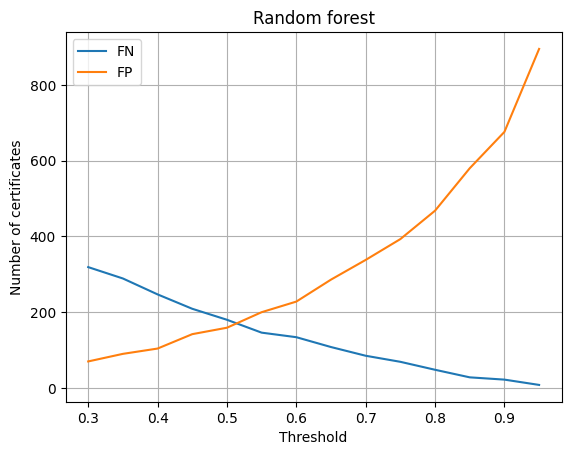

In [82]:
plt.plot(thresholds, fn, label="FN")
plt.plot(thresholds, fp, label="FP")
plt.legend()
plt.grid()
plt.xlabel("Threshold")
plt.ylabel("Number of certificates")
plt.title("Random forest")
plt.savefig("thresholdsRF.pdf")
plt.show()

In [83]:
confusion_matrix(test_labels, new_pred)[1,0]

8

In [84]:
svm = SVC(kernel="linear", C=0.03, probability=True)
svm.fit(train_scaled, train_labels)

SVC(C=0.03, kernel='linear', probability=True)

In [85]:
new_pred = []
thresholds = [x for x in np.arange(0.30, 1.0, 0.05)]
fn = []
fp = []

pred_prob_SVM = svm.predict_proba(test_scaled)

for thresh in thresholds:
    new_pred = []
    for value in pred_prob_SVM[:,0]:
        if value > thresh:
            new_pred.append(0)
        else:
            new_pred.append(1)
    fn.append(confusion_matrix(test_labels, new_pred)[1,0])
    fp.append(confusion_matrix(test_labels, new_pred)[0,1])

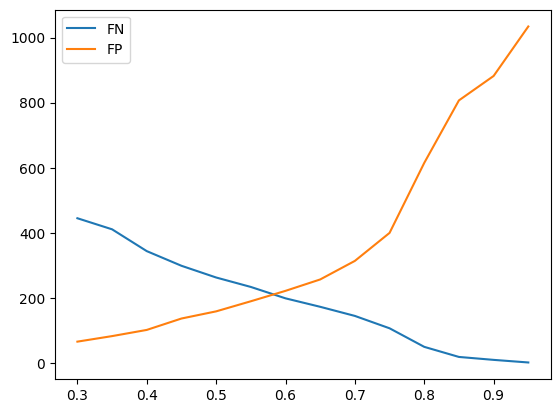

In [86]:
plt.plot(thresholds, fn, label="FN")
plt.plot(thresholds, fp, label="FP")
plt.legend()
plt.show()

In [87]:
knn

KNeighborsClassifier(n_neighbors=3)

In [88]:
new_pred = []
thresholds = [x for x in np.arange(0.30, 1.0, 0.05)]
fn = []
fp = []

pred_prob_knn = knn.predict_proba(test_scaled)

for thresh in thresholds:
    new_pred = []
    for value in pred_prob_knn[:,0]:
        if value > thresh:
            new_pred.append(0)
        else:
            new_pred.append(1)
    fn.append(confusion_matrix(test_labels, new_pred)[1,0])
    fp.append(confusion_matrix(test_labels, new_pred)[0,1])

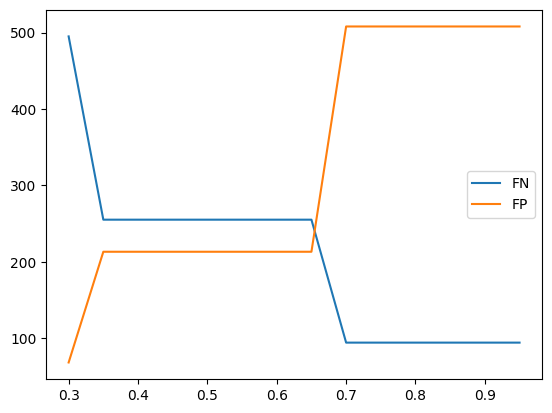

In [89]:
plt.plot(thresholds, fn, label="FN")
plt.plot(thresholds, fp, label="FP")
plt.legend()
plt.show()

In [90]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_labels, pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

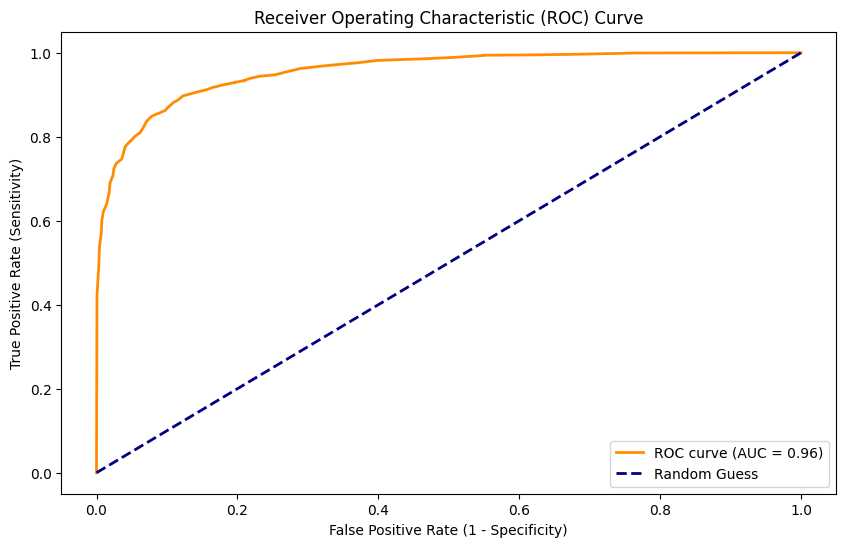

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [92]:
print("RF")
print(np.mean([0.87964004, 0.88913774, 0.890625  , 0.88048916, 0.88338028]))

print("KNN")
print(np.mean([0.82847141, 0.84362377, 0.83594203, 0.83632157, 0.83056872]))
print(np.mean([0.85031303, 0.86078758, 0.83932584, 0.83490828, 0.84025014]))

print("SVM")
print(np.mean([0.84192635, 0.85924251, 0.8446712 , 0.82379863, 0.83266705]))
print(np.mean([0.85113636, 0.8685259 , 0.85342388, 0.84606613, 0.84457143]))
print(np.mean([0.80777778, 0.82211275, 0.81522956, 0.78868552, 0.8002251 ]))
print(np.mean([0.85180995, 0.86807539, 0.85762521, 0.84872521, 0.848     ]))

RF
0.8846544439999999
KNN
0.8349854999999999
0.845116974
SVM
0.8404611479999999
0.85274474
0.8068061419999999
0.8548471519999999


In [93]:
if run_NN:
    X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_features_merged, target = 'phish', 
                                                                                train_size=0.7, valid_size=0.15, test_size=0.15)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_valid)
    model = tf.keras.Sequential([    
        tf.keras.layers.Dense(128, activation='relu', input_shape=(train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # prófa líka .005
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
    
    X = np.asarray(train_scaled).astype(np.float32)
    y = np.asarray(y_train).astype(np.float32)
    X_valid_trans = np.asarray(test_scaled).astype(np.float32)
    y_valid_trans = np.asarray(y_valid).astype(np.float32)
    history = model.fit(X, y, 
              epochs = 50,
             validation_data=(X_valid_trans, y_valid_trans),
             )

In [94]:
if run_NN:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [95]:
# np.mean([0.89839034, 0.91231627, 0.89959016, 0.9022869 , 0.91104294])

In [96]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [97]:
# param_grid = { 
#     'n_estimators': [25, 50, 100, 150], 
#     'max_features': ['sqrt', 'log2', None], 
#     # 'max_depth': [3, 6, 9], 
#     # 'max_leaf_nodes': [3, 6, 9], 
# } 

In [98]:
# grid_search = GridSearchCV(RandomForestClassifier(), 
#                            param_grid=param_grid) 
# grid_search.fit(train_scaled, train_labels) 
# print(grid_search.best_estimator_) 

In [99]:
# grid_search

## Time based evaluation

In [100]:

feature_names_timebased = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    "domain_len",
    "sus_keyword",
    "sus_tld",
    "shannon_entropy",
    "num_dashes",
    "num_tokens",
    "num_parts",
    "token_is_tld",
    "frac_special_char",
    # "is_ip",  # no domain is strictly an ip
    "is_international", # hefur engin áhrif í rf
    "frac_vowels",
    "frac_digits",
    "has_digit_only_subdomain", # hefur engin áhrif í rf
    "mean_len_subdomains",
    # "valid_tld_iana", # every line has valid iana tld
    "has_single_char_subdomain",
    "char_diversity",
    "alphabet_size",
    "is_wildcard_match",
    "has_wildcard_san",
    # "domain_pred",
    "phish",
    "not_before_date"
]



features_san_domain_timebased = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    "domain_len",
    "new_sus_keyword",
    "sus_tld",
    "shannon_entropy",
    "num_dashes",
    "num_tokens",
    "num_parts",
    "token_is_tld_new",
    "frac_special_char",
    # "is_ip",  # no domain is strictly an ip
    "is_international", # hefur engin áhrif í rf
    "frac_vowels",
    "frac_digits",
    "has_digit_only_subdomain", # hefur engin áhrif í rf
    "mean_len_subdomains",
    # "valid_tld_iana", # every line has valid iana tld
    "has_single_char_subdomain",
    "char_diversity",
    "alphabet_size",
    "is_wildcard_match",
    "has_wildcard_san",
    # "domain_pred",
    "phish",
    "mean_san_domain_len",
    "san_sus_keyword",
    "san_sus_tld",
    "san_shannon_entropy",
    "san_num_dashes",
    "san_num_tokens",
    "san_num_parts",
    "san_token_is_tld",
    "san_frac_special_char",
    "san_is_ip",
    "san_is_international",
    "san_frac_vowels",
    "san_frac_digits",
    "san_has_digit_only_subdomain",
    "san_mean_len_subdomains",
    "san_valid_tld_iana",
    "san_has_single_char_subdomain",
    "san_char_diversity",
    "san_alphabet_size",
    "not_before_date"
]

In [101]:
df = df_class
df.drop_duplicates(subset=["serial_number"], inplace=True)
df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
df.reset_index(drop=True, inplace=True)
df_features = df[feature_names_timebased]
df_features_merged = df_features.join(df_preds)#, left_index=True, right_index=True)
# df_features = df_features.drop(columns=["issuer_org"], axis=1)
df_features_merged = pd.get_dummies(df_features_merged,
                             prefix=["validation_level", "pub_key_algorithm", "signature_algorithm_name"],
                             columns=["validation_level", "pub_key_algorithm", "signature_algorithm_name"])
df_features_merged.reset_index(drop=True, inplace=True)
# print(df_features.signed_certificate_timestamp)

df_features_merged = convert_bool_to_int(df_features_merged)
df_features_merged.dropna(axis=0, inplace=True)


In [102]:
df_features_merged.columns

Index(['apple_ever_valid', 'nss_ever_valid', 'microsoft_ever_valid',
       'subject_has_country', 'subject_has_province', 'subject_has_locality',
       'subject_has_common_name', 'subject_only_cn', 'subject_len',
       'length_seconds', 'ocsp_urls', 'crl_dist_point_present',
       'num_san_dns_names', 'version', 'len_serial_number', 'len_issuer_dn',
       'issuer_has_common_name', 'subject_is_empty', 'lcs_sans',
       'lcs_sans_normed', 'authority_info_access', 'certificate_policies',
       'basic_constraints', 'key_usage_value', 'authority_key_id',
       'domain_len', 'sus_keyword', 'sus_tld', 'shannon_entropy', 'num_dashes',
       'num_tokens', 'num_parts', 'token_is_tld', 'frac_special_char',
       'is_international', 'frac_vowels', 'frac_digits',
       'has_digit_only_subdomain', 'mean_len_subdomains',
       'has_single_char_subdomain', 'char_diversity', 'alphabet_size',
       'is_wildcard_match', 'has_wildcard_san', 'phish', 'not_before_date',
       'lstm_feature_0',

In [103]:
train_1 = df_features_merged[df_features_merged.not_before_date < "2023-5-1"]
test_may = df_features_merged[(df_features_merged.not_before_date >= "2023-5-1") & (df_features_merged.not_before_date < "2023-6-1")]
test_june = df_features_merged[(df_features_merged.not_before_date >= "2023-6-1") & (df_features_merged.not_before_date < "2023-7-1")]
test_july = df_features_merged[(df_features_merged.not_before_date >= "2023-7-1") & (df_features_merged.not_before_date < "2023-8-1")]
test_august = df_features_merged[(df_features_merged.not_before_date >= "2023-8-1") & (df_features_merged.not_before_date < "2023-9-1")]
test_september = df_features_merged[(df_features_merged.not_before_date >= "2023-9-1") & (df_features_merged.not_before_date < "2023-10-1")]


In [104]:
def balance_phish_tranco(df):
    phish = df[df.phish == 1]
    tranco = df[df.phish == 0]
    len_phish = len(phish)    
    len_tranco = len(tranco)
    if len_phish > len_tranco:
        phish = phish.sample(n=len_tranco)
    else:
        tranco = tranco.sample(n=len_phish)
    return phish.append(tranco)

In [105]:
balanced = balance_phish_tranco(train_1)

In [106]:
balanced.phish.value_counts()

1    2665
0    2665
Name: phish, dtype: int64

In [107]:
features = balanced.drop(columns=["phish", "not_before_date"], axis=1)
train_labels = balanced["phish"]

# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25,
#                                                                             random_state=42)
scaler = preprocessing.StandardScaler().fit(features)

train_scaled = scaler.transform(features)
# test_scaled = scaler.transform(test_features)

In [108]:
balanced

,apple_ever_valid,nss_ever_valid,microsoft_ever_valid,subject_has_country,subject_has_province,subject_has_locality,subject_has_common_name,subject_only_cn,subject_len,length_seconds,...,validation_level_OV,validation_level_UNKNOWN,pub_key_algorithm_3,pub_key_algorithm_5,signature_algorithm_name_ECDSA-SHA256,signature_algorithm_name_ECDSA-SHA384,signature_algorithm_name_SHA1-RSA,signature_algorithm_name_SHA256-RSA,signature_algorithm_name_SHA384-RSA,signature_algorithm_name_SHA512-RSA
0,1,1,1,0,0,0,1,1,10,7775999,...,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,0,0,1,1,22,7775999,...,0,0,1,0,0,0,0,1,0,0
4,1,1,1,0,0,0,1,1,22,7775999,...,0,0,0,1,0,1,0,0,0,0
5,1,1,1,0,0,0,1,1,20,7775999,...,0,0,1,0,0,0,0,1,0,0
6,1,1,1,0,0,0,1,1,24,7862399,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7327,1,1,1,1,1,1,1,0,45,31795199,...,1,0,1,0,0,0,0,1,0,0
6823,1,1,1,0,0,0,1,1,23,31622399,...,0,0,1,0,0,0,0,0,0,1
6583,1,1,1,1,1,1,1,0,60,31622399,...,1,0,1,0,0,0,0,1,0,0
6521,1,1,1,0,0,0,1,1,23,7775999,...,0,0,1,0,0,0,0,1,0,0


In [109]:
f1_scores_train = []
MCCs_train = []

In [110]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(train_scaled, train_labels)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled, train_labels)

svm = SVC(kernel="linear", C=0.03)
svm.fit(train_scaled, train_labels)

SVC(C=0.03, kernel='linear')

In [111]:
features_may = test_may.drop(columns=["phish", "not_before_date"], axis=1)
labels_may = test_may["phish"]
test_scaled_may = scaler.transform(features_may)

features_june = test_june.drop(columns=["phish", "not_before_date"], axis=1)
labels_june = test_june["phish"]
test_scaled_june = scaler.transform(features_june)

features_july = test_july.drop(columns=["phish", "not_before_date"], axis=1)
labels_july = test_july["phish"]
test_scaled_july = scaler.transform(features_july)

features_august = test_august.drop(columns=["phish", "not_before_date"], axis=1)
labels_august = test_august["phish"]
test_scaled_august = scaler.transform(features_august)

features_september = test_september.drop(columns=["phish", "not_before_date"], axis=1)
labels_september = test_september["phish"]
test_scaled_september = scaler.transform(features_september)

In [112]:
f1_scores_test = []
MCCs_test = []
f1_scores_test_knn = []
MCCs_test_knn = []
f1_scores_test_svm = []
MCCs_test_svm = []


pred = rf.predict(test_scaled_may)
print("-------- Random Forrest ----- Test MAY-----")
print(f"Test score: {rf.score(test_scaled_may, labels_may)}")
print(f"Accuracy: {accuracy_score(labels_may, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_may, pred))
f1 = f1_score(labels_may, pred)
f1_scores_test.append(f1)
print(f"F1 score: {f1}")
mcc = matthews_corrcoef(labels_may, pred)
MCCs_test.append(mcc)
print(f"MCC: {mcc}")

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled_may)
print("-------- KNN 3 ----- Test MAY-----")
print(f"Test score: {knn.score(test_scaled_may, labels_may)}")
print(f"Accuracy: {accuracy_score(labels_may, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_may, pred))
f1 = f1_score(labels_may, pred)
f1_scores_test_knn.append(f1)
print(f"F1 score: {f1}")
mcc = matthews_corrcoef(labels_may, pred)
MCCs_test_knn.append(mcc)
print(f"MCC: {mcc}")


svm = SVC(kernel="linear", C=0.03)
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled_may)
print("-------- SVM ----- Test MAY-----")
print(f"Test score: {svm.score(test_scaled_may, labels_may)}")
print(f"Accuracy: {accuracy_score(labels_may, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_may, pred))
f1 = f1_score(labels_may, pred)
f1_scores_test_svm.append(f1)
print(f"F1 score: {f1}")
mcc = matthews_corrcoef(labels_may, pred)
MCCs_test_svm.append(mcc)
print(f"MCC: {mcc}")

##############

joined_df = train_1.append(test_may)
balanced_joined = balance_phish_tranco(joined_df)

features_joined = balanced_joined.drop(columns=["phish", "not_before_date"], axis=1)
labels_joined = balanced_joined["phish"]

train_features_joined, test_features_joined, train_labels_joined, test_labels_joined = train_test_split(features_joined, labels_joined, test_size=0.25,
                                                                            random_state=42)
train_scaled_joined = scaler.transform(train_features_joined)
test_scaled_joined = scaler.transform(test_features_joined)



rf_withMay = RandomForestClassifier(n_estimators=50, random_state=42)
rf_withMay.fit(train_scaled_joined, train_labels_joined)
pred = rf_withMay.predict(test_scaled_joined)
print("-------- Random Forrest ----- Trained with MAY-----")
print(f"Test score: {rf_withMay.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")


knn_withMay = KNeighborsClassifier(n_neighbors=3)
knn_withMay.fit(train_scaled_joined, train_labels_joined)
pred = knn_withMay.predict(test_scaled_joined)
print("-------- KNN ----- Trained MAY-----")
print(f"Test score: {knn_withMay.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
f1 = f1_score(test_labels_joined, pred)
print(f"F1 score: {f1}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")


svm_withMay = SVC(kernel="linear", C=0.03)
svm_withMay.fit(train_scaled_joined, train_labels_joined)
pred = svm_withMay.predict(test_scaled_joined)
print("-------- SVM ----- Trained MAY-----")
print(f"Test score: {svm_withMay.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
f1 = f1_score(test_labels_joined, pred)
print(f"F1 score: {f1}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")


########################################################################

pred = rf_withMay.predict(test_scaled_june)
print("-------- Random Forrest ----- Test JUNE-----")
print(f"Test score: {rf_withMay.score(test_scaled_june, labels_june)}")
print(f"Accuracy: {accuracy_score(labels_june, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_june, pred))
f1 = f1_score(labels_june, pred)
f1_scores_test.append(f1)
print(f"F1 score: {f1_score(labels_june, pred)}")
mcc = matthews_corrcoef(labels_june, pred)
MCCs_test.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_june, pred)}")


pred = knn_withMay.predict(test_scaled_june)
print("-------- KNN 3 ----- Test June-----")
print(f"Test score: {knn_withMay.score(test_scaled_june, labels_june)}")
print(f"Accuracy: {accuracy_score(labels_june, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_june, pred))
f1 = f1_score(labels_june, pred)
f1_scores_test_knn.append(f1)
print(f"F1 score: {f1_score(labels_june, pred)}")
mcc = matthews_corrcoef(labels_june, pred)
MCCs_test_knn.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_june, pred)}")

pred = svm_withMay.predict(test_scaled_june)
print("-------- SVM ----- Test June-----")
print(f"Test score: {svm_withMay.score(test_scaled_june, labels_june)}")
print(f"Accuracy: {accuracy_score(labels_june, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_june, pred))
f1 = f1_score(labels_june, pred)
f1_scores_test_svm.append(f1)
print(f"F1 score: {f1_score(labels_june, pred)}")
mcc = matthews_corrcoef(labels_june, pred)
MCCs_test_svm.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_june, pred)}")

#############

joined_df = joined_df.append(test_june)
balanced_joined = balance_phish_tranco(joined_df)

features_joined = balanced_joined.drop(columns=["phish", "not_before_date"], axis=1)
labels_joined = balanced_joined["phish"]

train_features_joined, test_features_joined, train_labels_joined, test_labels_joined = train_test_split(features_joined, labels_joined, test_size=0.25,
                                                                            random_state=42)
train_scaled_joined = scaler.transform(train_features_joined)
test_scaled_joined = scaler.transform(test_features_joined)

rf_withJune = RandomForestClassifier(n_estimators=50, random_state=42)
rf_withJune.fit(train_scaled_joined, train_labels_joined)
pred = rf_withJune.predict(test_scaled_joined)
print("-------- Random Forrest ----- Trained with June-----")
print(f"Test score: {rf_withJune.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")


knn_withJune = KNeighborsClassifier(n_neighbors=3)
knn_withJune.fit(train_scaled_joined, train_labels_joined)
pred = knn_withJune.predict(test_scaled_joined)
print("-------- KNN ----- Trained with June-----")
print(f"Test score: {knn_withJune.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

svm_withJune = SVC(kernel="linear", C=0.03)
svm_withJune.fit(train_scaled_joined, train_labels_joined)
pred = svm_withJune.predict(test_scaled_joined)
print("-------- SVM ----- Trained with June-----")
print(f"Test score: {svm_withJune.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

############################################################################

pred = rf_withJune.predict(test_scaled_july)
print("-------- Random Forrest ----- Test July-----")
print(f"Test score: {rf_withJune.score(test_scaled_july, labels_july)}")
print(f"Accuracy: {accuracy_score(labels_july, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_july, pred))
f1 = f1_score(labels_july, pred)
f1_scores_test.append(f1)
print(f"F1 score: {f1_score(labels_july, pred)}")
mcc = matthews_corrcoef(labels_july, pred)
MCCs_test.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_july, pred)}")

pred = knn_withJune.predict(test_scaled_july)
print("-------- KNN ----- Test July-----")
print(f"Test score: {knn_withJune.score(test_scaled_july, labels_july)}")
print(f"Accuracy: {accuracy_score(labels_july, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_july, pred))
f1 = f1_score(labels_july, pred)
f1_scores_test_knn.append(f1)
print(f"F1 score: {f1_score(labels_july, pred)}")
mcc = matthews_corrcoef(labels_july, pred)
MCCs_test_knn.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_july, pred)}")

pred = svm_withJune.predict(test_scaled_july)
print("-------- SVM ----- Test July-----")
print(f"Test score: {svm_withJune.score(test_scaled_july, labels_july)}")
print(f"Accuracy: {accuracy_score(labels_july, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_july, pred))
f1 = f1_score(labels_july, pred)
f1_scores_test_svm.append(f1)
print(f"F1 score: {f1_score(labels_july, pred)}")
mcc = matthews_corrcoef(labels_july, pred)
MCCs_test_svm.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_july, pred)}")

###########

joined_df = joined_df.append(test_july)
balanced_joined = balance_phish_tranco(joined_df)

features_joined = balanced_joined.drop(columns=["phish", "not_before_date"], axis=1)
labels_joined = balanced_joined["phish"]

train_features_joined, test_features_joined, train_labels_joined, test_labels_joined = train_test_split(features_joined, labels_joined, test_size=0.25,
                                                                            random_state=42)
train_scaled_joined = scaler.transform(train_features_joined)
test_scaled_joined = scaler.transform(test_features_joined)

rf_withJuly = RandomForestClassifier(n_estimators=50, random_state=42)
rf_withJuly.fit(train_scaled_joined, train_labels_joined)
pred = rf_withJuly.predict(test_scaled_joined)
print("-------- Random Forrest ----- Trained with July-----")
print(f"Test score: {rf_withJuly.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")


knn_withJuly = KNeighborsClassifier(n_neighbors=3)
knn_withJuly.fit(train_scaled_joined, train_labels_joined)
pred = knn_withJuly.predict(test_scaled_joined)
print("-------- KNN ----- Trained with July-----")
print(f"Test score: {knn_withJuly.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

svm_withJuly = SVC(kernel="linear", C=0.03)
svm_withJuly.fit(train_scaled_joined, train_labels_joined)
pred = svm_withJuly.predict(test_scaled_joined)
print("-------- SVM ----- Trained with July-----")
print(f"Test score: {svm_withJuly.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

##########################################################################

pred = rf_withJuly.predict(test_scaled_august)
print("-------- Random Forrest ----- Test August-----")
print(f"Test score: {rf_withJuly.score(test_scaled_august, labels_august)}")
print(f"Accuracy: {accuracy_score(labels_august, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_august, pred))
f1 = f1_score(labels_august, pred)
f1_scores_test.append(f1)
print(f"F1 score: {f1_score(labels_august, pred)}")
mcc = matthews_corrcoef(labels_august, pred)
MCCs_test.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_august, pred)}")


pred = knn_withJuly.predict(test_scaled_august)
print("-------- KNN ----- Test August-----")
print(f"Test score: {knn_withJuly.score(test_scaled_august, labels_august)}")
print(f"Accuracy: {accuracy_score(labels_august, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_august, pred))
f1 = f1_score(labels_august, pred)
f1_scores_test_knn.append(f1)
print(f"F1 score: {f1_score(labels_august, pred)}")
mcc = matthews_corrcoef(labels_august, pred)
MCCs_test_knn.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_august, pred)}")

pred = svm_withJuly.predict(test_scaled_august)
print("-------- SVM ----- Test August-----")
print(f"Test score: {svm_withJuly.score(test_scaled_august, labels_august)}")
print(f"Accuracy: {accuracy_score(labels_august, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_august, pred))
f1 = f1_score(labels_august, pred)
f1_scores_test_svm.append(f1)
print(f"F1 score: {f1_score(labels_august, pred)}")
mcc = matthews_corrcoef(labels_august, pred)
MCCs_test_svm.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_august, pred)}")


###############

joined_df = joined_df.append(test_august)
balanced_joined = balance_phish_tranco(joined_df)

features_joined = balanced_joined.drop(columns=["phish", "not_before_date"], axis=1)
labels_joined = balanced_joined["phish"]

train_features_joined, test_features_joined, train_labels_joined, test_labels_joined = train_test_split(features_joined, labels_joined, test_size=0.25,
                                                                            random_state=42)
train_scaled_joined = scaler.transform(train_features_joined)
test_scaled_joined = scaler.transform(test_features_joined)

rf_withAugust = RandomForestClassifier(n_estimators=50, random_state=42)
rf_withAugust.fit(train_scaled_joined, train_labels_joined)
pred = rf_withAugust.predict(test_scaled_joined)
print("-------- Random Forrest ----- Trained with August-----")
print(f"Test score: {rf_withAugust.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")



knn_withAugust = KNeighborsClassifier(n_neighbors=3)
knn_withAugust.fit(train_scaled_joined, train_labels_joined)
pred = knn_withAugust.predict(test_scaled_joined)
print("-------- KNN ----- Trained with August-----")
print(f"Test score: {knn_withAugust.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

svm_withAugust = SVC(kernel="linear", C=0.03)
svm_withAugust.fit(train_scaled_joined, train_labels_joined)
pred = svm_withAugust.predict(test_scaled_joined)
print("-------- SVM ----- Trained with August-----")
print(f"Test score: {svm_withAugust.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

###########################################################################3

pred = rf_withAugust.predict(test_scaled_september)
print("-------- Random Forrest ----- Test September-----")
print(f"Test score: {rf_withAugust.score(test_scaled_september, labels_september)}")
print(f"Accuracy: {accuracy_score(labels_september, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_september, pred))
f1 = f1_score(labels_september, pred)
f1_scores_test.append(f1)
print(f"F1 score: {f1_score(labels_september, pred)}")
mcc = matthews_corrcoef(labels_september, pred)
MCCs_test.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_september, pred)}")

pred = knn_withAugust.predict(test_scaled_september)
print("-------- KNN ----- Test September-----")
print(f"Test score: {knn_withAugust.score(test_scaled_september, labels_september)}")
print(f"Accuracy: {accuracy_score(labels_september, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_september, pred))
f1 = f1_score(labels_september, pred)
f1_scores_test_knn.append(f1)
print(f"F1 score: {f1_score(labels_september, pred)}")
mcc = matthews_corrcoef(labels_september, pred)
MCCs_test_knn.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_september, pred)}")

pred = svm_withAugust.predict(test_scaled_september)
print("-------- SVM ----- Test September-----")
print(f"Test score: {svm_withAugust.score(test_scaled_september, labels_september)}")
print(f"Accuracy: {accuracy_score(labels_september, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_september, pred))
f1 = f1_score(labels_september, pred)
f1_scores_test_svm.append(f1)
print(f"F1 score: {f1_score(labels_september, pred)}")
mcc = matthews_corrcoef(labels_september, pred)
MCCs_test_svm.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_september, pred)}")
# joined_df = joined_df.append(test_september)
# balanced_joined = balance_phish_tranco(joined_df)

# features_joined = balanced_joined.drop(columns=["phish", "not_before_date"], axis=1)
# labels_joined = balanced_joined["phish"]

# train_features_joined, test_features_joined, train_labels_joined, test_labels_joined = train_test_split(features_joined, labels_joined, test_size=0.25,
#                                                                             random_state=42)
# train_scaled_joined = scaler.transform(train_features_joined)
# test_scaled_joined = scaler.transform(test_features_joined)

# rf_withSeptember = RandomForestClassifier(n_estimators=50, random_state=42)
# rf_withSeptember.fit(train_scaled_joined, train_labels_joined)
# pred = rf_withSeptember.predict(test_scaled_joined)
# print("-------- Random Forrest ----- Trained with September-----")
# print(f"Test score: {rf_withSeptember.score(test_scaled_joined, test_labels_joined)}")
# print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
# print("Confusion matrix")
# print(confusion_matrix(test_labels_joined, pred))
# print(f"F1 score: {f1_score(test_labels_joined, pred)}")
# print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

-------- Random Forrest ----- Test MAY-----
Test score: 0.8550185873605948
Accuracy: 0.8550185873605948
Confusion matrix
[[278  53]
 [ 64 412]]
F1 score: 0.8756641870350691
MCC: 0.7021485769311632
-------- KNN 3 ----- Test MAY-----
Test score: 0.7930607187112764
Accuracy: 0.7930607187112764
Confusion matrix
[[255  76]
 [ 91 385]]
F1 score: 0.8217716115261473
MCC: 0.575664860452144
-------- SVM ----- Test MAY-----
Test score: 0.8339529120198265
Accuracy: 0.8339529120198265
Confusion matrix
[[281  50]
 [ 84 392]]
F1 score: 0.8540305010893245
MCC: 0.6645598798236105
-------- Random Forrest ----- Trained with MAY-----
Test score: 0.8726925525143221
Accuracy: 0.8726925525143221
Confusion matrix
[[687  93]
 [107 684]]
F1 score: 0.8724489795918366
MCC: 0.7455227985432556
-------- KNN ----- Trained MAY-----
Test score: 0.8402291534054742
Accuracy: 0.8402291534054742
Confusion matrix
[[652 128]
 [123 668]]
F1 score: 0.8418399495904222
MCC: 0.6804421838142197
-------- SVM ----- Trained MAY-----


In [113]:
print([ '%.2f' % elem for elem in f1_scores_test ])
print([ '%.2f' % elem for elem in f1_scores_test_knn ])
print([ '%.2f' % elem for elem in f1_scores_test_svm ])


['0.88', '0.87', '0.87', '0.90', '0.90']
['0.82', '0.86', '0.84', '0.86', '0.86']
['0.85', '0.85', '0.85', '0.87', '0.88']


In [114]:
print(np.mean(f1_scores_test))
print(np.mean(f1_scores_test_knn))
print(np.mean(f1_scores_test_svm))

0.8828657543736378
0.849235336352072
0.8624407166457964


In [115]:
print([ '%.2f' % elem for elem in MCCs_test])
print([ '%.2f' % elem for elem in MCCs_test_knn])
print([ '%.2f' % elem for elem in MCCs_test_svm])

['0.70', '0.69', '0.65', '0.69', '0.69']
['0.58', '0.66', '0.56', '0.60', '0.55']
['0.66', '0.67', '0.63', '0.63', '0.64']


In [116]:
print(np.mean(MCCs_test))
print(np.mean(MCCs_test_knn))
print(np.mean(MCCs_test_svm))

0.6844353612134098
0.5920285491643419
0.6457822804624964


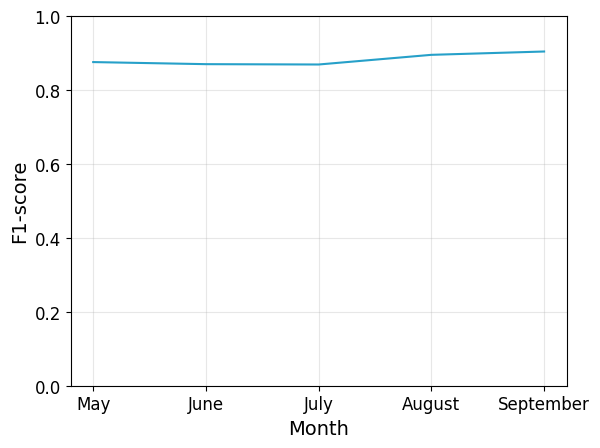

In [117]:
plt.plot(["May", "June", "July", "August", "September"], f1_scores_test, color='#26A0C9')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.xlabel('Month', fontsize=14)
plt.ylabel('F1-score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("f1ScoreTimeEval.pdf", bbox_inches="tight")
plt.show()

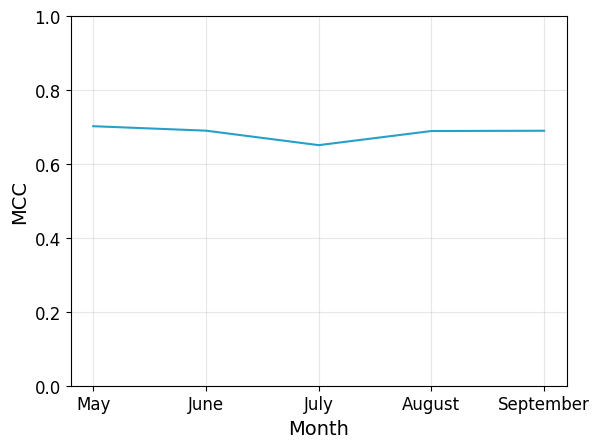

In [118]:
plt.plot(["May", "June", "July", "August", "September"], MCCs_test, color='#26A0C9')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.xlabel('Month', fontsize=14)
plt.ylabel('MCC', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("mccTimeEval.pdf", bbox_inches="tight")
plt.show()